<a href="https://colab.research.google.com/github/Derinhelm/parser_stat/blob/mmd_metric/MMD_Russian_parser_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repository cloning

In [ ]:
!git clone https://github.com/Derinhelm/parser_stat.git

Cloning into 'parser_stat'...
remote: Enumerating objects: 302, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 302 (delta 34), reused 37 (delta 15), pack-reused 231 (from 1)
Receiving objects: 100% (302/302), 50.33 MiB | 18.73 MiB/s, done.
Resolving deltas: 100% (161/161), done.


In [ ]:
import sys
sys.path.append('/content/parser_stat')

In [ ]:
!mkdir pics

# Data getting

In [ ]:
from data_classes import ConllEntry, Sentence

In [ ]:
import pickle

In [ ]:
with open('/content/parser_stat/treebank_test_sets/treebank_data.pickle', 'rb') as f:
    treebanks = pickle.load(f)

In [ ]:
for t, sent_list in treebanks.items():
    print(t, len(sent_list))
    # checking the index uniqueness
    assert len({s.sent_id for s in sent_list}) == len(sent_list)

gsd 601
pud 1000
syntagrus 8800
poetry 728
taiga 881


In [ ]:
treebank_names = ['taiga', 'poetry', 'gsd', 'pud', 'syntagrus']

# Parsing result getting

In [ ]:
import pandas as pd

In [ ]:
parser_names = ["natasha", "udpipe", "spacy", "deeppavlov", "stanza"]

In [ ]:
parser_res = {}
for p in parser_names:
    with open(f'/content/parser_stat/pickle_results/{p}.pickle', 'rb') as f:
       parser_res[p] = pickle.load(f)

In [ ]:
for p in parser_names:
  for t in treebanks:
    assert len(treebanks[t]) == len(parser_res[p][t])

In [ ]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][1].tokens]

[('1', '11', 'acl'),
 ('2', '3', 'case'),
 ('3', '1', 'obl'),
 ('4', '6', 'case'),
 ('5', '6', 'amod'),
 ('6', '1', 'obl'),
 ('7', '6', 'nmod'),
 ('8', '11', 'amod'),
 ('9', '10', 'cc'),
 ('10', '8', 'conj'),
 ('11', '12', 'nsubj'),
 ('12', '0', 'root'),
 ('13', '12', 'obl'),
 ('14', '15', 'cc'),
 ('15', '13', 'conj'),
 ('16', '15', 'nmod'),
 ('17', '12', 'punct')]

In [ ]:
[i for (i, t) in enumerate(parser_res['stanza']['syntagrus'][95].tokens) if t.id == '1']

[0, 10]

In [ ]:
parser_res['udpipe']['poetry'][1].sent_id

'xix__plesheev__plesh-029-2'

In [ ]:
parser_res['stanza']['syntagrus'][1].sent_id

'2003Armeniya.xml_2'

In [ ]:
for t in treebank_names:
  for p in parser_names:
      print(t, p, len([i for (i, sent) in enumerate(parser_res[p][t])
       if len([t.relation for t in sent.tokens if t.relation == "root"]) > 1]))

taiga natasha 95
taiga udpipe 42
taiga spacy 69
taiga deeppavlov 67
taiga stanza 69
poetry natasha 148
poetry udpipe 43
poetry spacy 24
poetry deeppavlov 50
poetry stanza 65
gsd natasha 83
gsd udpipe 7
gsd spacy 14
gsd deeppavlov 18
gsd stanza 5
pud natasha 98
pud udpipe 7
pud spacy 18
pud deeppavlov 3
pud stanza 4
syntagrus natasha 1073
syntagrus udpipe 57
syntagrus spacy 220
syntagrus deeppavlov 131
syntagrus stanza 190


In [ ]:
[i for (i, sent) in enumerate(parser_res['stanza']['syntagrus'])
    if len([t.relation for t in sent.tokens if t.relation == "root"]) > 2]

[6424]

In [ ]:
parser_res['stanza']['syntagrus'][6424].sent_id

'2013Martovskaya_revolyutsiya.xml_88'

In [ ]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][1].tokens]

[('1', '11', 'acl'),
 ('2', '3', 'case'),
 ('3', '1', 'obl'),
 ('4', '6', 'case'),
 ('5', '6', 'amod'),
 ('6', '1', 'obl'),
 ('7', '6', 'nmod'),
 ('8', '11', 'amod'),
 ('9', '10', 'cc'),
 ('10', '8', 'conj'),
 ('11', '12', 'nsubj'),
 ('12', '0', 'root'),
 ('13', '12', 'obl'),
 ('14', '15', 'cc'),
 ('15', '13', 'conj'),
 ('16', '15', 'nmod'),
 ('17', '12', 'punct')]

In [ ]:
def shift_token_id(sentence):
  first_token_shift = 0
  for i, t in enumerate(sentence.tokens):
    if t.id == '1':
      first_token_shift = i
    shift_id = str(int(t.id) + first_token_shift)
    if t.parent_id != '0':
      shift_parent_id = str(int(t.parent_id) + first_token_shift)
    else:
      shift_parent_id = '0'
    #print(shift_id, t.id, "    ", shift_parent_id, t.parent_id)
    t.id = shift_id
    t.parent_id = shift_parent_id

In [ ]:
for t in treebank_names:
  for p in parser_names:
    for s in parser_res[p][t]:
      shift_token_id(s)

In [ ]:
[(t.id, t.parent_id, t.relation) for t in parser_res['stanza']['syntagrus'][6424].tokens]

[('1', '0', 'root'),
 ('2', '3', 'advmod'),
 ('3', '1', 'nsubj'),
 ('4', '3', 'obl'),
 ('5', '9', 'punct'),
 ('6', '9', 'cc'),
 ('7', '8', 'amod'),
 ('8', '9', 'nsubj'),
 ('9', '1', 'conj'),
 ('10', '12', 'case'),
 ('11', '12', 'det'),
 ('12', '9', 'obl'),
 ('13', '17', 'punct'),
 ('14', '17', 'amod'),
 ('15', '17', 'amod'),
 ('16', '17', 'amod'),
 ('17', '12', 'parataxis'),
 ('18', '19', 'punct'),
 ('19', '17', 'parataxis'),
 ('20', '19', 'flat'),
 ('21', '22', 'amod'),
 ('22', '19', 'nmod'),
 ('23', '19', 'punct'),
 ('24', '1', 'punct'),
 ('25', '27', 'amod'),
 ('26', '27', 'amod'),
 ('27', '0', 'root'),
 ('28', '29', 'punct'),
 ('29', '27', 'parataxis'),
 ('30', '29', 'flat'),
 ('31', '29', 'punct'),
 ('32', '27', 'punct'),
 ('33', '35', 'amod'),
 ('34', '35', 'amod'),
 ('35', '0', 'root'),
 ('36', '37', 'punct'),
 ('37', '35', 'parataxis'),
 ('38', '37', 'flat'),
 ('39', '37', 'punct'),
 ('40', '41', 'punct'),
 ('41', '35', 'conj'),
 ('42', '41', 'nmod'),
 ('43', '44', 'punct'),
 (

# Creating token start-end pairs

be_edges - set of dependency tree edges in begin-end format

In [ ]:
def create_sent_be_nodes(sent, text_transform):
    token_begin_end = []
    sent_text = text_transform(sent.text)
    original_sent_text = text_transform(sent.text)
    del_prefix_len = 0
    tokens = [t for t in sent.tokens if '.' not in t.id]
    for t_i, t in enumerate(tokens):
        token_text = text_transform(t.form)
        t_start = sent_text.find(token_text)
        if t_start == -1:
            print("Error:", sent.sent_id, f"sent_text:{sent_text}, t:{token_text}", t_i)
        else:
            b, e = (del_prefix_len + t_start,
                                  del_prefix_len + t_start + len(token_text))
            token_begin_end.append((t, (b, e)))
            del_prefix_len += t_start + len(token_text)
            sent_text = sent_text[t_start + len(token_text):]
            assert text_transform(original_sent_text[b:e]) == text_transform(tokens[t_i].form)
    sent_text = text_transform(sent.text)
    return token_begin_end

In [ ]:
def create_sent_be_edges(sent_be_tokens):
    sent_be_res = {}
    for t_id, (t, t_be) in enumerate(sent_be_tokens): # ellipsis are deleted, so index in sent_be_tokens = token_id
      parent_id = t.parent_id
      if parent_id == '0': # root
        parent_be = (-1, -1)
      else:
        _, parent_be = sent_be_tokens[int(parent_id) - 1]
      sent_be_res[t_be] = (parent_be, t.relation)
    return sent_be_res

In [ ]:
from collections import OrderedDict

In [ ]:
be_treebanks = {}
for treebank_n in treebank_names:
    be_treebanks[treebank_n] = OrderedDict()
    for i, sent in enumerate(treebanks[treebank_n]):
        be_sent = create_sent_be_nodes(sent, lambda text: text.lower())
        be_treebanks[treebank_n][sent.sent_id] = create_sent_be_edges(be_sent)

In [ ]:
be_treebanks['syntagrus']['2003Artist_mimansa.xml_130']

{(0, 2): ((16, 20), 'nsubj'),
 (3, 15): ((16, 20), 'advmod'),
 (16, 20): ((-1, -1), 'root'),
 (21, 24): ((25, 34), 'det'),
 (25, 34): ((16, 20), 'obj'),
 (35, 43): ((16, 20), 'advmod'),
 (43, 44): ((16, 20), 'punct')}

{(0, 2): ((16, 20), 'nsubj'),

 (3, 15): ((16, 20), 'advmod'),

 (16, 20): ((-1, -1), 'root'),

 (21, 24): ((25, 34), 'det'),

 (25, 34): ((16, 20), 'obj'),

 (35, 43): ((16, 20), 'advmod'),

 (43, 44): ((16, 20), 'punct')}


In [ ]:
be_parser_res = {p: {} for p in parser_names}
for p in parser_names:
  if p == 'deeppavlov':
    transform_fun = lambda text: text.lower().replace('``', '"').replace("''", '"')
  else:
    transform_fun = lambda text: text.lower().replace("''", '"')
  for t in treebank_names:
    be_parser_res[p][t] = OrderedDict()
    for i, sent in enumerate(parser_res[p][t]):
        be_sent = create_sent_be_nodes(sent, transform_fun)
        be_parser_res[p][t][sent.sent_id] = create_sent_be_edges(be_sent)

In [ ]:
be_parser_res['stanza']['syntagrus']['2003Armeniya.xml_2']

{(0, 11): ((87, 96), 'acl'),
 (12, 13): ((14, 24), 'case'),
 (14, 24): ((0, 11), 'obl'),
 (25, 27): ((39, 46), 'case'),
 (28, 38): ((39, 46), 'amod'),
 (39, 46): ((0, 11), 'obl'),
 (47, 54): ((39, 46), 'nmod'),
 (55, 67): ((87, 96), 'amod'),
 (68, 69): ((70, 86), 'cc'),
 (70, 86): ((55, 67), 'conj'),
 (87, 96): ((97, 105), 'nsubj'),
 (97, 105): ((-1, -1), 'root'),
 (106, 112): ((97, 105), 'obl'),
 (113, 114): ((115, 120), 'cc'),
 (115, 120): ((106, 112), 'conj'),
 (121, 127): ((115, 120), 'nmod'),
 (127, 128): ((97, 105), 'punct')}

((0, 2), ((16, 20), 'nsubj')),

((3, 9), ((16, 20), 'obl')),

((9, 10), ((10, 15), 'punct')),

((10, 15), ((3, 9), 'conj')),

((16, 20), ((-1, -1), 'root')),

((21, 24), ((25, 34), 'det')),

((25, 34), ((16, 20), 'obj')),

((35, 43), ((16, 20), 'advmod')),

((43, 44), ((16, 20), 'punct'))]

In [ ]:
be_parser_res['udpipe']['poetry']['xx__verxovsky__verx-096-2']

{(0, 1): ((2, 9), 'case'),
 (2, 9): ((30, 36), 'obl'),
 (10, 15): ((16, 20), 'amod'),
 (16, 20): ((30, 36), 'obl'),
 (21, 22): ((23, 27), 'cc'),
 (23, 27): ((16, 20), 'conj'),
 (28, 29): ((30, 36), 'nsubj'),
 (30, 36): ((37, 45), 'csubj'),
 (37, 45): ((-1, -1), 'root'),
 (45, 46): ((47, 51), 'punct'),
 (47, 51): ((37, 45), 'advcl'),
 (52, 56): ((47, 51), 'obj'),
 (57, 58): ((59, 64), 'case'),
 (59, 64): ((47, 51), 'obl'),
 (65, 67): ((77, 83), 'case'),
 (68, 76): ((77, 83), 'amod'),
 (77, 83): ((59, 64), 'nmod'),
 (83, 84): ((85, 89), 'punct'),
 (85, 89): ((47, 51), 'conj'),
 (90, 91): ((92, 96), 'case'),
 (92, 96): ((85, 89), 'obl'),
 (97, 98): ((92, 96), 'punct'),
 (98, 99): ((105, 109), 'punct'),
 (100, 104): ((105, 109), 'advmod'),
 (105, 109): ((37, 45), 'parataxis'),
 (110, 118): ((119, 123), 'amod'),
 (119, 123): ((105, 109), 'nmod'),
 (123, 124): ((130, 133), 'punct'),
 (125, 126): ((130, 133), 'cc'),
 (127, 129): ((130, 133), 'case'),
 (130, 133): ((37, 45), 'conj'),
 (134, 13

In [ ]:
be_treebanks['poetry']['xx__verxovsky__verx-096-2']

{(0, 1): ((2, 9), 'case'),
 (2, 9): ((37, 45), 'obl'),
 (10, 15): ((2, 9), 'amod'),
 (16, 20): ((2, 9), 'det'),
 (21, 22): ((23, 27), 'advmod'),
 (23, 27): ((30, 36), 'obj'),
 (28, 29): ((37, 45), 'nsubj'),
 (30, 36): ((37, 45), 'xcomp'),
 (37, 45): ((-1, -1), 'root'),
 (45, 46): ((47, 51), 'punct'),
 (47, 51): ((37, 45), 'advcl'),
 (52, 56): ((47, 51), 'obj'),
 (57, 58): ((59, 64), 'case'),
 (59, 64): ((47, 51), 'obl'),
 (65, 67): ((77, 83), 'case'),
 (68, 76): ((77, 83), 'amod'),
 (77, 83): ((47, 51), 'obl'),
 (83, 84): ((85, 89), 'punct'),
 (85, 89): ((37, 45), 'conj'),
 (90, 91): ((92, 96), 'case'),
 (92, 96): ((85, 89), 'obl'),
 (97, 99): ((105, 109), 'punct'),
 (100, 104): ((105, 109), 'advmod'),
 (105, 109): ((85, 89), 'obj'),
 (110, 118): ((119, 123), 'amod'),
 (119, 123): ((105, 109), 'nmod'),
 (123, 124): ((137, 141), 'punct'),
 (125, 126): ((137, 141), 'cc'),
 (127, 129): ((130, 133), 'case'),
 (130, 133): ((137, 141), 'orphan'),
 (134, 136): ((130, 133), 'punct'),
 (137, 14

# Sentence statistics

In [ ]:
import numpy as np
import networkx as nx
from collections import defaultdict

In [ ]:
'''

Предыдущий вариант

 def wl_ker(graphs, h=3):
    feature_maps = [defaultdict(int) for _ in graphs]

    # Инициализация меток
    for i, G in enumerate(graphs):
        for node in G.nodes():
            label = str(G.degree(node))  # Начальная метка — степень узла
            feature_maps[i][label] += 1

    # Итеративное обновление меток
    prev_labels = [defaultdict(str) for _ in graphs]
    for i, G in enumerate(graphs):
        prev_labels[i].update({node: str(G.degree(node)) for node in G.nodes()})

    for _ in range(h):
        new_labels = [defaultdict(str) for _ in graphs]
        for i, G in enumerate(graphs):
            for node in G.nodes():
                neighbor_info = []
                for neighbor in G.neighbors(node):
                    neighbor_label = prev_labels[i][neighbor]
                    edge_label = G[node][neighbor].get('label', '')  # Метка ребра
                    neighbor_info.append(f"{neighbor_label}_{edge_label}")
                neighbor_info_sorted = sorted(neighbor_info)
                if len(neighbor_info_sorted) == 0:
                    neighbor_info_sorted = ['none']
                new_label = f"{prev_labels[i][node]}_{'_'.join(neighbor_info_sorted)}"
                new_labels[i][node] = new_label
                feature_maps[i][new_label] += 1
        prev_labels = new_labels

    # Нормализация гистограмм
    for i in range(len(graphs)):
        total = sum(feature_maps[i].values())
        if total > 0:  # Избегаем деления на ноль
            for key in feature_maps[i]:
                feature_maps[i][key] /= total

    # Вычисление матрицы сходства
    K = np.zeros((len(graphs), len(graphs)))
    for i in range(len(graphs)):
        for j in range(i, len(graphs)):
            # Скалярное произведение с нормализацией
            dot_product = sum(feature_maps[i].get(k, 0) * feature_maps[j].get(k, 0) for k in set(feature_maps[i]) | set(feature_maps[j]))
            norm_i = np.sqrt(sum(feature_maps[i].get(k, 0)**2 for k in feature_maps[i]))
            norm_j = np.sqrt(sum(feature_maps[j].get(k, 0)**2 for k in feature_maps[j]))
            K[i, j] = dot_product / (norm_i * norm_j)

    return K
'''

'\n\nПредыдущий вариант\n\n def wl_ker(graphs, h=3):\n    feature_maps = [defaultdict(int) for _ in graphs]\n\n    # Инициализация меток\n    for i, G in enumerate(graphs):\n        for node in G.nodes():\n            label = str(G.degree(node))  # Начальная метка — степень узла\n            feature_maps[i][label] += 1\n\n    # Итеративное обновление меток\n    prev_labels = [defaultdict(str) for _ in graphs]\n    for i, G in enumerate(graphs):\n        prev_labels[i].update({node: str(G.degree(node)) for node in G.nodes()})\n\n    for _ in range(h):\n        new_labels = [defaultdict(str) for _ in graphs]\n        for i, G in enumerate(graphs):\n            for node in G.nodes():\n                neighbor_info = []\n                for neighbor in G.neighbors(node):\n                    neighbor_label = prev_labels[i][neighbor]\n                    edge_label = G[node][neighbor].get(\'label\', \'\')  # Метка ребра\n                    neighbor_info.append(f"{neighbor_label}_{edge_labe

In [ ]:
import numpy as np
from collections import defaultdict

def new_wl_ker1(results, references, h=3):
    assert len(results) == len(references), "Количество результатов и эталонов должно совпадать"

    feature_maps_results = [defaultdict(int) for _ in results]
    feature_maps_refs = [defaultdict(int) for _ in references]

    for i, G in enumerate(results):
        for node in G.nodes():
            label = str(G.degree(node))
            feature_maps_results[i][label] += 1

    for i, G in enumerate(references):
        for node in G.nodes():
            label = str(G.degree(node))
            feature_maps_refs[i][label] += 1

    prev_labels_results = [defaultdict(str) for _ in results]
    for i, G in enumerate(results):
        prev_labels_results[i].update({node: str(G.degree(node)) for node in G.nodes()})

    prev_labels_refs = [defaultdict(str) for _ in references]
    for i, G in enumerate(references):
        prev_labels_refs[i].update({node: str(G.degree(node)) for node in G.nodes()})

    for _ in range(h):
        new_labels_results = [defaultdict(str) for _ in results]
        for i, G in enumerate(results):
            for node in G.nodes():
                neighbor_info = []
                for neighbor in G.neighbors(node):
                    neighbor_label = prev_labels_results[i][neighbor]
                    edge_label = G[node][neighbor].get('label', '')
                    neighbor_info.append(f"{neighbor_label}_{edge_label}")
                neighbor_info_sorted = sorted(neighbor_info)
                if not neighbor_info_sorted:
                    neighbor_info_sorted = ['none']
                new_label = f"{prev_labels_results[i][node]}_{'_'.join(neighbor_info_sorted)}"
                new_labels_results[i][node] = new_label
                feature_maps_results[i][new_label] += 1
        prev_labels_results = new_labels_results

        new_labels_refs = [defaultdict(str) for _ in references]
        for i, G in enumerate(references):
            for node in G.nodes():
                neighbor_info = []
                for neighbor in G.neighbors(node):
                    neighbor_label = prev_labels_refs[i][neighbor]
                    edge_label = G[node][neighbor].get('label', '')
                    neighbor_info.append(f"{neighbor_label}_{edge_label}")
                neighbor_info_sorted = sorted(neighbor_info)
                if not neighbor_info_sorted:
                    neighbor_info_sorted = ['none']
                new_label = f"{prev_labels_refs[i][node]}_{'_'.join(neighbor_info_sorted)}"
                new_labels_refs[i][node] = new_label
                feature_maps_refs[i][new_label] += 1
        prev_labels_refs = new_labels_refs

    for i in range(len(results)):
        total = sum(feature_maps_results[i].values())
        if total > 0:
            for key in feature_maps_results[i]:
                feature_maps_results[i][key] /= total

    for i in range(len(references)):
        total = sum(feature_maps_refs[i].values())
        if total > 0:
            for key in feature_maps_refs[i]:
                feature_maps_refs[i][key] /= total

    similarities = np.zeros(len(results))
    for i in range(len(results)):
        # Скалярное произведение с нормализацией
        dot_product = sum(feature_maps_results[i].get(k, 0) * feature_maps_refs[i].get(k, 0)
                         for k in set(feature_maps_results[i]) | set(feature_maps_refs[i]))
        norm_i = np.sqrt(sum(feature_maps_results[i].get(k, 0)**2 for k in feature_maps_results[i]))
        norm_j = np.sqrt(sum(feature_maps_refs[i].get(k, 0)**2 for k in feature_maps_refs[i]))

        if norm_i * norm_j > 0:
            similarities[i] = dot_product / (norm_i * norm_j)
        else:
            similarities[i] = 0.0

    return similarities

In [ ]:
def networkx_formatter(dict_Graph, nx_Graph, show=False):
    for node, value in dict_Graph.items():
        if isinstance(value, tuple) and len(value) == 2:
            head, label = value
            nx_Graph.add_node(node)
            if head != (-1, -1):
                nx_Graph.add_edge(node, head, label=label)
        else:
            print(f"Пропущено значение для узла {value} (некорректная структура)\n")

    if show:
        plt.figure(figsize=(16, 12))
        pos = nx.planar_layout(nx_Graph, scale=4)
        nx.draw(nx_Graph, pos, with_labels=True, node_size=1000, node_color="lightblue", font_size=6, font_weight="bold")

    return nx_Graph

### Оne sentence (example)

In [ ]:
be_treebanks['taiga']['1']

{(0, 3): ((4, 9), 'advmod'),
 (4, 9): ((12, 18), 'obl'),
 (10, 11): ((12, 18), 'case'),
 (12, 18): ((-1, -1), 'root'),
 (19, 22): ((12, 18), 'nmod'),
 (23, 24): ((25, 28), 'cc'),
 (25, 28): ((19, 22), 'conj'),
 (29, 33): ((12, 18), 'cop'),
 (34, 39): ((40, 43), 'advmod'),
 (40, 43): ((44, 50), 'nummod:gov'),
 (44, 50): ((12, 18), 'nsubj'),
 (51, 52): ((81, 86), 'cc'),
 (53, 59): ((81, 86), 'nummod:gov'),
 (60, 66): ((81, 86), 'amod'),
 (67, 80): ((81, 86), 'amod'),
 (81, 86): ((44, 50), 'conj'),
 (86, 87): ((12, 18), 'punct')}

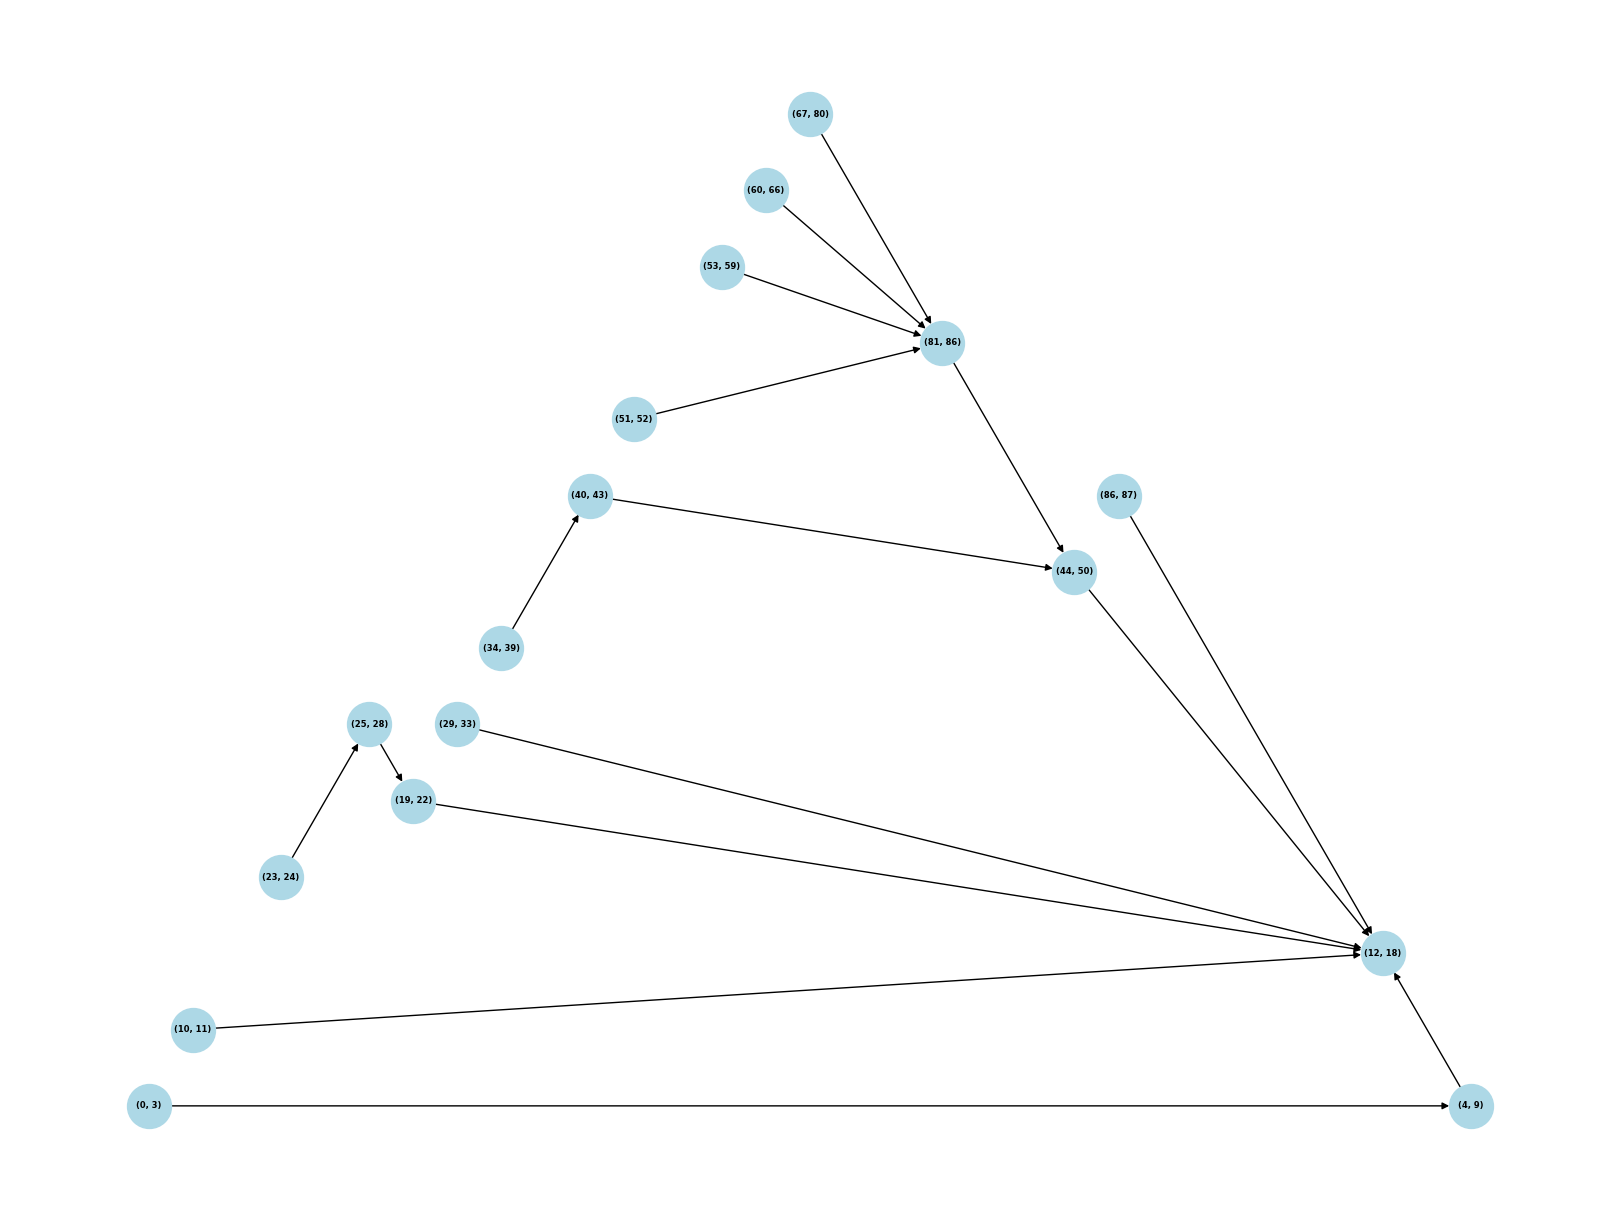

In [ ]:
P = networkx_formatter(be_treebanks['taiga']['1'], nx.DiGraph(), True)

In [ ]:
be_treebanks['syntagrus']['2003Armeniya.xml_2']

{(0, 11): ((87, 96), 'acl'),
 (12, 13): ((14, 24), 'case'),
 (14, 24): ((0, 11), 'obl'),
 (25, 27): ((39, 46), 'case'),
 (28, 38): ((39, 46), 'amod'),
 (39, 46): ((14, 24), 'nmod'),
 (47, 54): ((39, 46), 'nmod'),
 (55, 67): ((87, 96), 'amod'),
 (68, 69): ((70, 86), 'cc'),
 (70, 86): ((55, 67), 'conj'),
 (87, 96): ((97, 105), 'nsubj'),
 (97, 105): ((-1, -1), 'root'),
 (106, 112): ((97, 105), 'obl'),
 (113, 114): ((115, 120), 'cc'),
 (115, 120): ((106, 112), 'conj'),
 (121, 127): ((115, 120), 'nmod'),
 (127, 128): ((97, 105), 'punct')}

In [ ]:
be_parser_res['stanza']['syntagrus']['2003Armeniya.xml_2']

{(0, 11): ((87, 96), 'acl'),
 (12, 13): ((14, 24), 'case'),
 (14, 24): ((0, 11), 'obl'),
 (25, 27): ((39, 46), 'case'),
 (28, 38): ((39, 46), 'amod'),
 (39, 46): ((0, 11), 'obl'),
 (47, 54): ((39, 46), 'nmod'),
 (55, 67): ((87, 96), 'amod'),
 (68, 69): ((70, 86), 'cc'),
 (70, 86): ((55, 67), 'conj'),
 (87, 96): ((97, 105), 'nsubj'),
 (97, 105): ((-1, -1), 'root'),
 (106, 112): ((97, 105), 'obl'),
 (113, 114): ((115, 120), 'cc'),
 (115, 120): ((106, 112), 'conj'),
 (121, 127): ((115, 120), 'nmod'),
 (127, 128): ((97, 105), 'punct')}

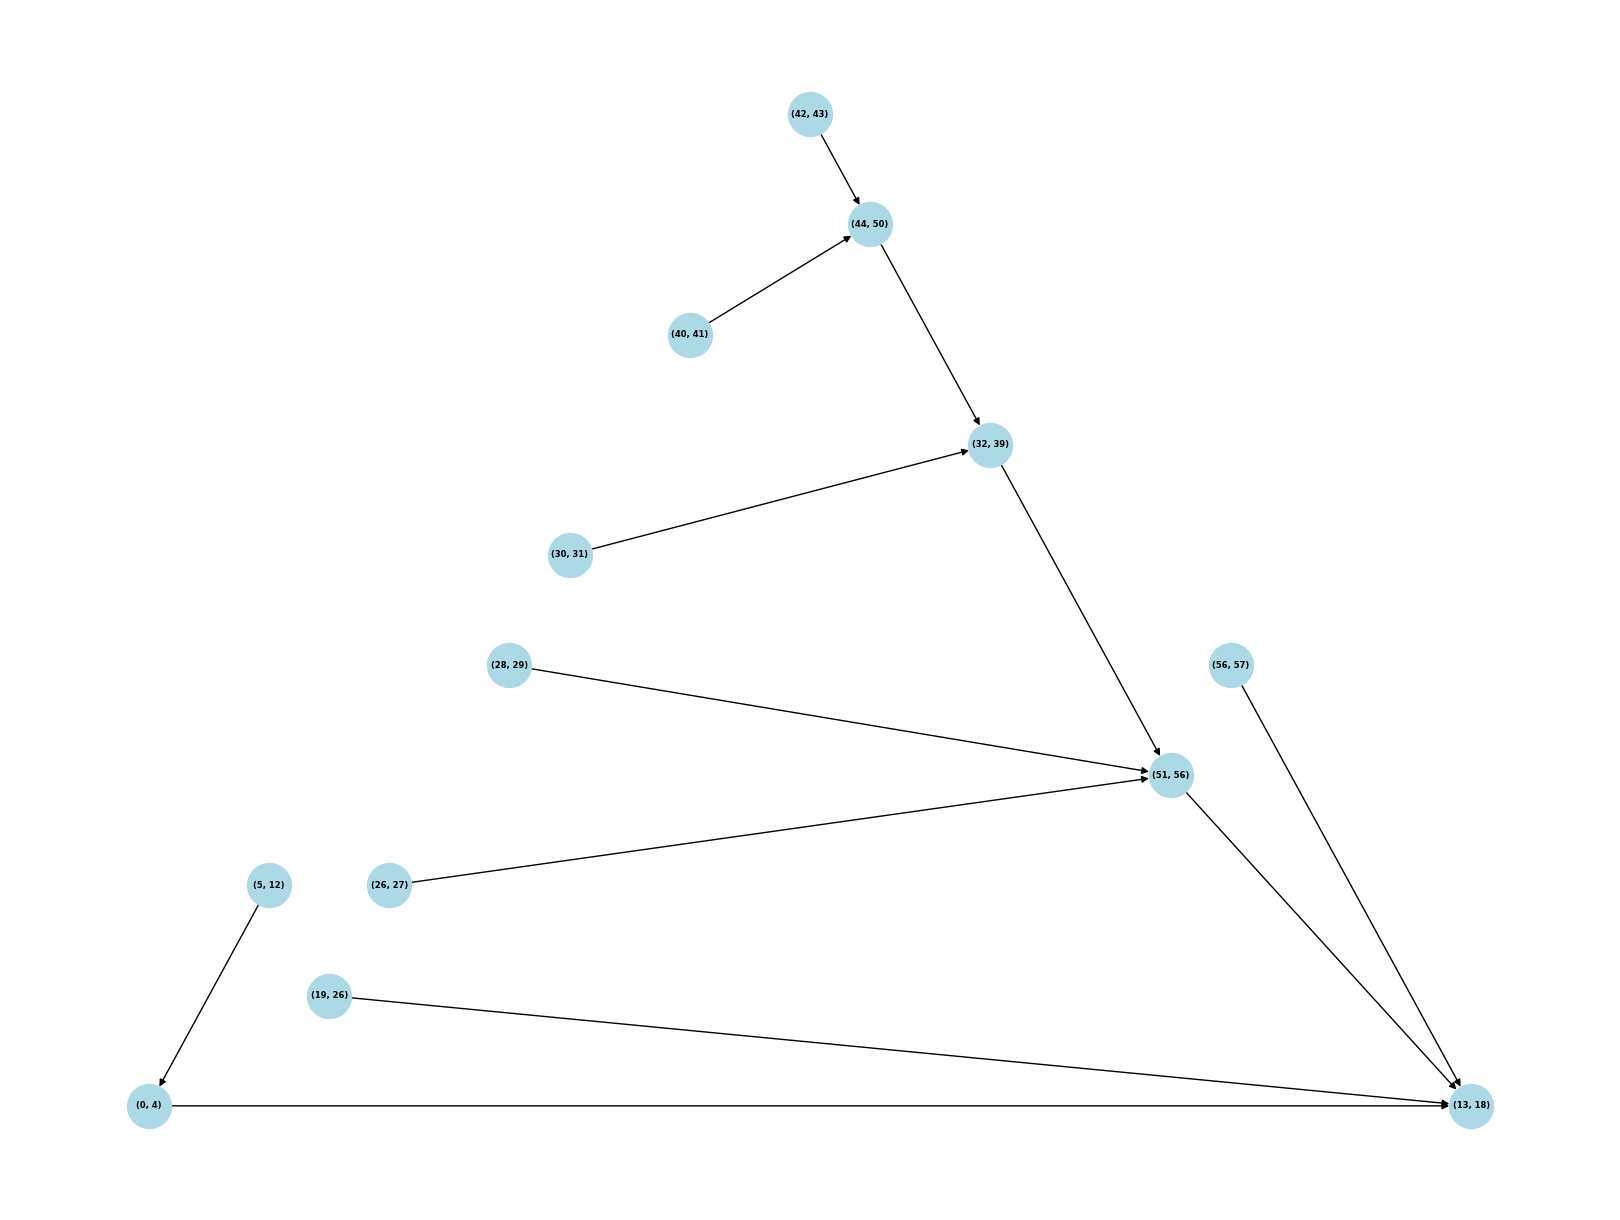

In [ ]:
Q = networkx_formatter(be_treebanks['poetry']['xx__ryzhiy__ryzh-452-3'], nx.DiGraph(), True)

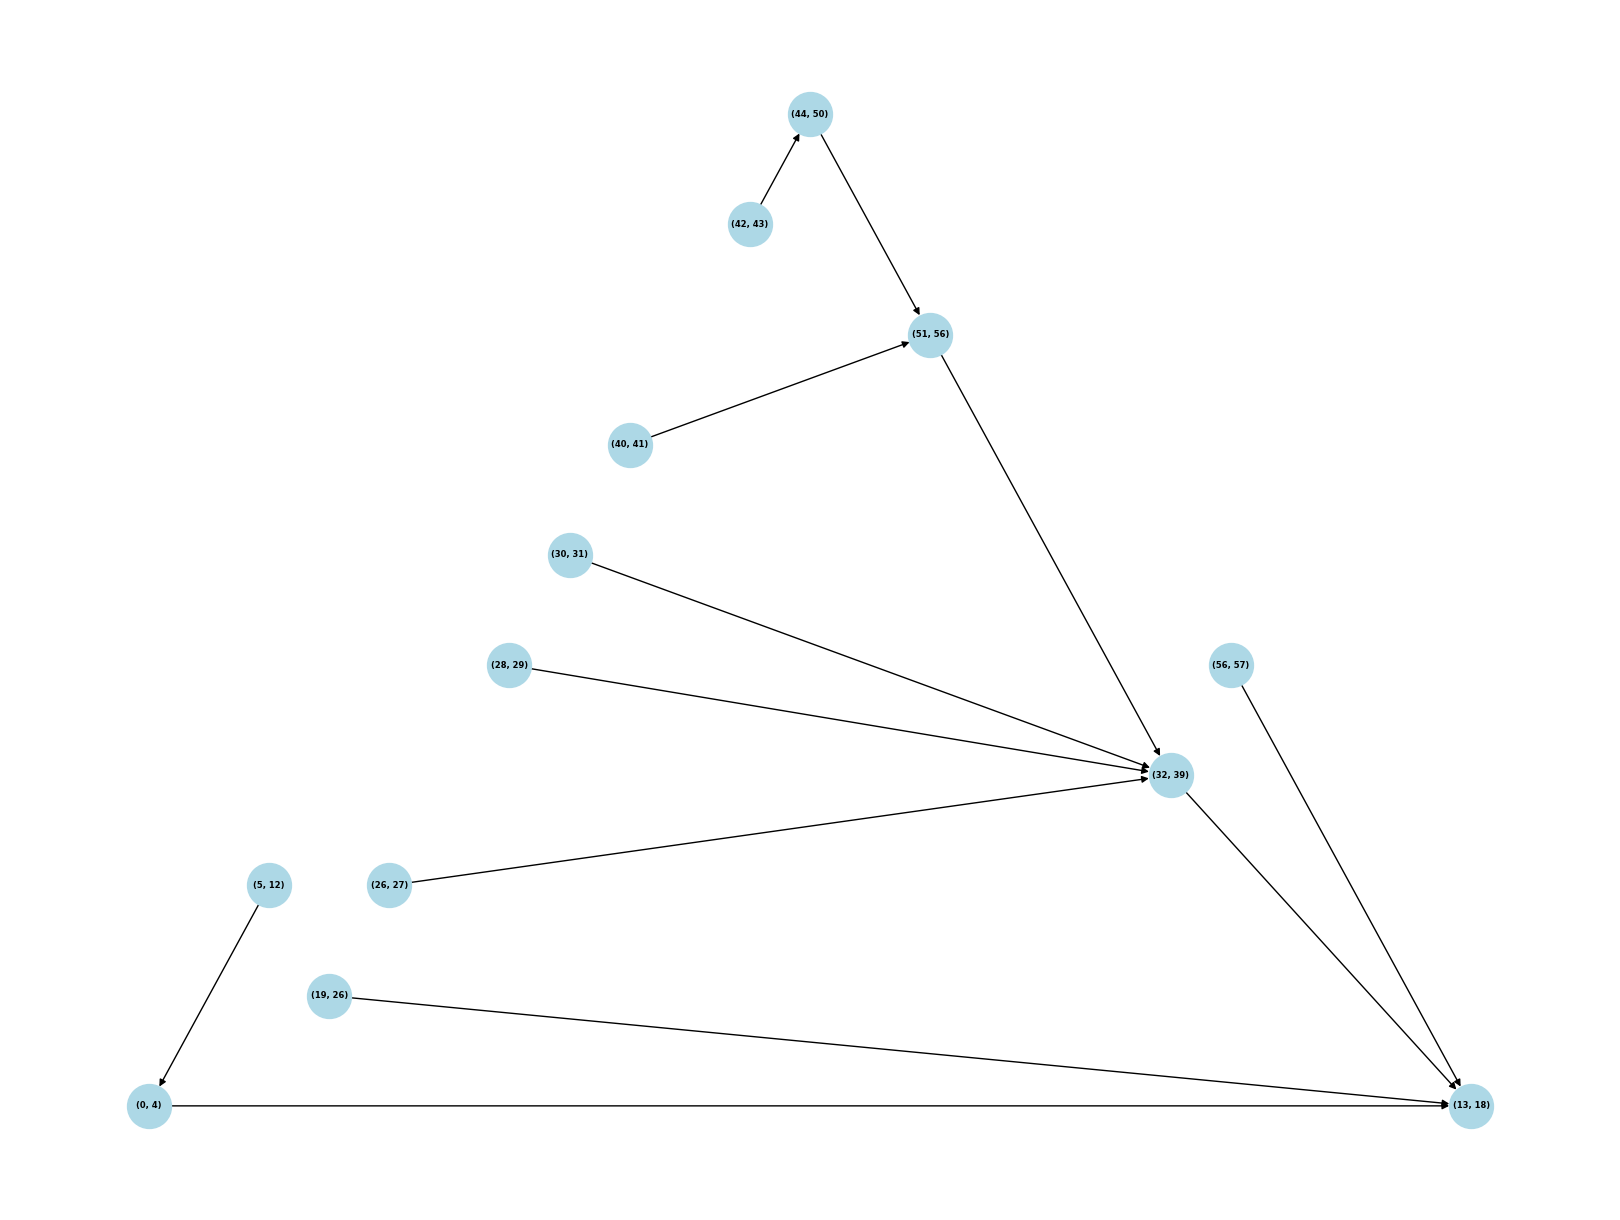

In [ ]:
Q = networkx_formatter(be_parser_res['udpipe']['poetry']['xx__ryzhiy__ryzh-452-3'], nx.DiGraph(), True)

### For parser "Stanza" and dataset "Taiga"

In [ ]:
Graphs_P1 = []
for key, item in be_treebanks['taiga'].items():
    Graphs_P1.append(networkx_formatter(item, nx.DiGraph()))

In [ ]:
Graphs_Q1 = []
for key, item in be_parser_res['stanza']['taiga'].items():
    Graphs_Q1.append(networkx_formatter(item, nx.DiGraph()))

In [ ]:
K = new_wl_ker1(Graphs_P1, Graphs_Q1, h=0)
print(f"Сходство (WL): {(sum(K)/len(K)):.4f}")

Сходство (WL): 0.9651


In [ ]:
K = new_wl_ker1(Graphs_P1, Graphs_Q1, h=1)
print(f"Сходство (WL): {(sum(K)/len(K)):.4f}")

Сходство (WL): 0.8778


In [ ]:
K = new_wl_ker1(Graphs_P1, Graphs_Q1, h=2)
print(f"Сходство (WL): {(sum(K)/len(K)):.4f}")

Сходство (WL): 0.8060


In [ ]:
K = new_wl_ker1(Graphs_P1, Graphs_Q1, h=3)
print(f"Сходство (WL): {(sum(K)/len(K)):.4f}")

Сходство (WL): 0.7517


In [ ]:
K = new_wl_ker1(Graphs_P1, Graphs_Q1, h=4)
print(f"Сходство (WL): {(sum(K)/len(K)):.4f}")

Сходство (WL): 0.7102


In [ ]:
K = new_wl_ker1(Graphs_P1, Graphs_Q1, h=5)
print(f"Сходство (WL): {(sum(K)/len(K)):.4f}")

Сходство (WL): 0.6774


# Mean values

In [ ]:
similarity_results = {}

for parser_key in be_parser_res.keys():
    similarity_results[parser_key] = {}
    for treebank_key in be_treebanks.keys():
        print(treebank_key)
        Graphs_P1 = []
        for k, item in be_treebanks[treebank_key].items():
            Graphs_P1.append(networkx_formatter(item, nx.DiGraph()))
        Graphs_Q1 = []
        for k, item in be_parser_res[parser_key][treebank_key].items():
            Graphs_Q1.append(networkx_formatter(item, nx.DiGraph()))

        similarity_results[parser_key][treebank_key] = new_wl_ker1(Graphs_P1, Graphs_Q1, h=3)

taiga
poetry
gsd
pud
syntagrus
taiga
poetry
gsd
pud
syntagrus
taiga
poetry
gsd
pud
syntagrus
taiga
poetry
gsd
pud
syntagrus
taiga
poetry
gsd
pud
syntagrus


In [ ]:
# DataFrame для средних значений сходства
similarity_mean_df = pd.DataFrame(
    [[f"{np.mean(similarity_results[p][treebank]):.3f}"
      for treebank in treebank_names]
     for p in parser_names],
    index=parser_names,
    columns=treebank_names
)

similarity_mean_df.round(2)

taiga poetry    gsd    pud syntagrus
natasha     0.696  0.700  0.788  0.836     0.805
udpipe      0.724  0.763  0.786  0.835     0.854
spacy       0.743  0.770  0.822  0.871     0.838
deeppavlov  0.761  0.808  0.838  0.886     0.895
stanza      0.752  0.801  0.823  0.881     0.901

In [ ]:
# DataFrame для медианных значений сходства
similarity_median_df = pd.DataFrame(
    [[f"{np.median(similarity_results[p][treebank]):.3f}"
      for treebank in treebank_names]
     for p in parser_names],
    index=parser_names,
    columns=treebank_names
)

similarity_median_df.round(2)

taiga poetry    gsd    pud syntagrus
natasha     0.700  0.724  0.792  0.827     0.811
udpipe      0.732  0.773  0.792  0.831     0.869
spacy       0.749  0.778  0.828  0.878     0.864
deeppavlov  0.777  0.822  0.859  0.902     0.940
stanza      0.778  0.808  0.838  0.893     0.954

In [ ]:
# DataFrame для минимальных значений сходства
similarity_min_df = pd.DataFrame(
    [[f"{np.min(similarity_results[p][treebank]):.3f}"
      for treebank in treebank_names]
     for p in parser_names],
    index=parser_names,
    columns=treebank_names
)

similarity_min_df.round(2)

taiga poetry    gsd    pud syntagrus
natasha     0.000  0.000  0.231  0.413     0.182
udpipe      0.000  0.000  0.355  0.413     0.242
spacy       0.000  0.000  0.290  0.413     0.167
deeppavlov  0.000  0.000  0.286  0.413     0.000
stanza      0.000  0.000  0.375  0.413     0.242

In [ ]:
# DataFrame для максимальных значений сходства
similarity_min_df = pd.DataFrame(
    [[f"{np.max(similarity_results[p][treebank]):.3f}"
      for treebank in treebank_names]
     for p in parser_names],
    index=parser_names,
    columns=treebank_names
)

similarity_min_df.round(2)

taiga poetry    gsd    pud syntagrus
natasha     1.000  1.000  1.000  1.000     1.000
udpipe      1.000  1.000  1.000  1.000     1.000
spacy       1.000  1.000  1.000  1.000     1.000
deeppavlov  1.000  1.000  1.000  1.000     1.000
stanza      1.000  1.000  1.000  1.000     1.000

In [ ]:
# Для пороговых значений (значение + процент)
threshold = 0.6  # Пороговое значение

similarity_threshold_df = pd.DataFrame(
    [[f"{sum(sim >= threshold)} ({sum(sim >= threshold) / len(sim)*100:.0f}%)"
      for treebank in treebank_names
      for sim in [similarity_results[p][treebank]]]
     for p in parser_names],
    index=parser_names,
    columns=treebank_names
)

similarity_threshold_df.round(2)

taiga     poetry        gsd        pud   syntagrus
natasha     607 (69%)  549 (75%)  550 (92%)  979 (98%)  7964 (90%)
udpipe      641 (73%)  606 (83%)  548 (91%)  979 (98%)  8302 (94%)
spacy       657 (75%)  611 (84%)  565 (94%)  982 (98%)  8063 (92%)
deeppavlov  695 (79%)  636 (87%)  572 (95%)  986 (99%)  8439 (96%)
stanza      666 (76%)  641 (88%)  566 (94%)  987 (99%)  8451 (96%)

In [ ]:
threshold = 0.4  # Пример порогового значения

similarity_threshold_df = pd.DataFrame(
    [[f"{sum(sim <= threshold)} ({sum(sim <= threshold) / len(sim)*100:.0f}%)"
      for treebank in treebank_names
      for sim in [similarity_results[p][treebank]]]
     for p in parser_names],
    index=parser_names,
    columns=treebank_names
)

similarity_threshold_df.round(2)

taiga   poetry     gsd     pud syntagrus
natasha     68 (8%)  61 (8%)  5 (1%)  0 (0%)   93 (1%)
udpipe      52 (6%)  24 (3%)  3 (0%)  0 (0%)   42 (0%)
spacy       45 (5%)  27 (4%)  3 (0%)  0 (0%)  100 (1%)
deeppavlov  35 (4%)  20 (3%)  3 (0%)  0 (0%)   49 (1%)
stanza      46 (5%)  20 (3%)  1 (0%)  0 (0%)   42 (0%)

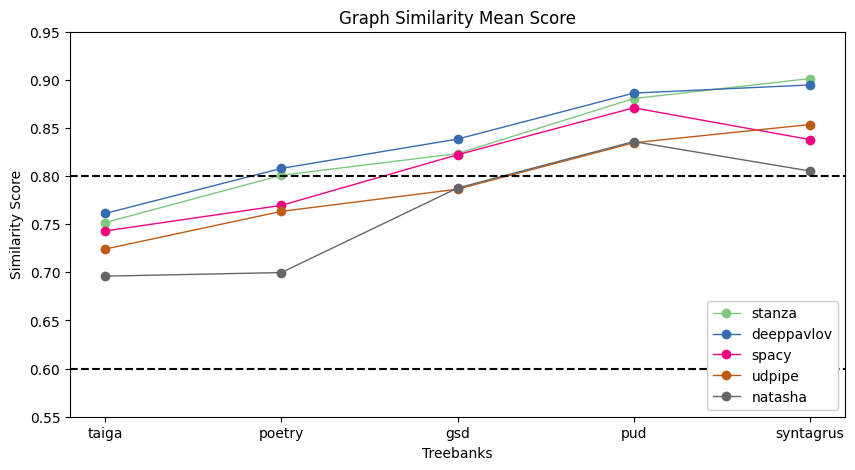

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

def draw_similarity_values(ax, data, title="Graph Similarity Mean Score"):
    colors = colormaps['Accent'].colors
    colors = (colors[0],) + colors[4:]

    for parser_i, p in enumerate(parser_names[::-1]):
        values = [np.mean(data[p][t]) for t in treebank_names]
        ax.plot(treebank_names, values,
                color=colors[parser_i],
                label=p,
                marker='.',
                linewidth=1,
                markersize=12)

    ax.legend(loc='lower right', framealpha=1.0)
    ax.set_title(title)

    ax.axhline(y=0.6, color="black", linestyle="--")
    ax.axhline(y=0.8, color="black", linestyle="--")
    ax.set_ylim([0.55, 0.95])

    ax.set_xlabel("Treebanks")
    ax.set_ylabel("Similarity Score")

plt.figure(figsize=(10, 5))
ax = plt.gca()

draw_similarity_values(ax, similarity_results)

plt.show()

# Boxplots

In [ ]:
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps

In [ ]:
def draw_hboxplot(ax_plot, data, p):
    b = ax_plot.boxplot(x=data, showfliers=False, showcaps=True, showmeans=True,
            meanprops={'color':'grey', 'linewidth': 4, 'linestyle':'solid'},
            medianprops={'color': 'black', 'linewidth': 3},
            vert=False, meanline=True, widths=0.3)
    ax_plot.set_xlim([-0.02, 1.2])
    ax_plot.get_yaxis().set_visible(False)
    c = b['caps'][0]._x[0]
    ax_plot.text(
          c,
          0.79,
          f'{c:.2}',
          horizontalalignment='center',
          fontsize=12,
      )

    u_q1 = data.quantile(0.25)
    ax_plot.text(
        u_q1,
        0.65,
        f'{u_q1:.2}',
        horizontalalignment='center',
        fontsize=12,
    )
    u_q2 = data.quantile(0.5)
    if u_q2 != 1.0:
      ax_plot.text(
        u_q2,
        0.5,
        f'{u_q2:.2}',
        horizontalalignment='center',
        fontsize=12,
        color='black'
      )
    u_q3 = data.quantile(0.75)
    if u_q3 != 1.0:
      ax_plot.text(
        u_q3,
        0.35,
        f'{u_q3:.2}',
        horizontalalignment='center',
        fontsize=12,
      )

    u_mean = data.mean()
    if u_mean != 1.0:
      ax_plot.text(
            u_mean,
            1.2,
            f'{u_mean:.2}',
            horizontalalignment='center',
            fontsize=12,
            color='black'
      )

In [ ]:
def draw_hist(ax_plot, data):
      step = 0.2
      bins1 = [round(step * i, 1) for i in range(0, 6)] + [1.01]
      v_5 = ax_plot.hist(data, bins=bins1, color="white", edgecolor='black',
                         linewidth=0.4)
      for i, v in enumerate(v_5[0]):
        rate = round(v / len(data) * 100)
        if rate >= 5:
          if i == len(v_5[0]) - 1:
            text_color = 'black'
          else:
            text_color = 'black'
          ax_plot.text(i * step, v + len(data) / 20, f"{rate}%", color=text_color, size=12)
      step2 = 0.05
      max2 = 20
      bins2 = [round(step2 * i, 2) for i in range(0, max2 + 1)] + [1.01]
      v_20 = ax_plot.hist(data, bins=bins2, rwidth=0.8)
      v_20[2][-1].set_facecolor('black')
      ax_plot.set_ylim([0, len(data) * 0.85])
      ax_plot.set_xlim([-0.02, 1.2])
      xlabels = [round(0.2 * i, 2) for i in range(0, 6)]
      ax_plot.set_xticks(xlabels, xlabels, fontdict={'fontsize':12})

In [ ]:
def draw_similarity_diagrams(similarity_data, file_title):
    matplotlib.rc('xtick', labelsize=12)
    matplotlib.rc('ytick', labelsize=12)
    matplotlib.rcParams['axes.linewidth'] = 1

    fig = plt.figure(figsize = (16,24))

    gs = gridspec.GridSpec(4 * len(treebank_names), len(parser_names), figure=fig,
                  wspace=0.1, hspace=0.5,
                  height_ratios=(0.01, 0.01,  0.09, 0.09) * len(treebank_names))

    for treebank_i, t in enumerate(treebank_names):
      ax_t = fig.add_subplot(gs[4 * treebank_i, :])
      ax_t.text(0.5, 0.8, t, va="top", ha="center", fontsize=24, weight="bold")
      if treebank_i != 0:
        ax_t.axhline(y=1, color='gray', lw=1)
      ax_t.axis('off')

      for parser_i, p in enumerate(parser_names):
          ax_tp = fig.add_subplot(gs[4 * treebank_i + 1, parser_i])
          ax_tp.text(0.5, 0.5, p, va="top", ha="center", fontsize=18)
          ax_tp.axis('off')

          ax_h = fig.add_subplot(gs[4 * treebank_i + 2, parser_i])
          if parser_i != 0:
              ax_h.get_yaxis().set_visible(False)
          # Используем similarity_data вместо align_uas_f
          draw_hist(ax_h, pd.Series(similarity_data[p][t]))

          ax_b = fig.add_subplot(gs[4 * treebank_i + 3, parser_i])
          # Используем similarity_data вместо align_uas_f
          draw_hboxplot(ax_b, pd.Series(similarity_data[p][t]), p)
          ax_b.get_xaxis().set_visible(False)
          ax_b.axis('off')

    plt.savefig(f"{file_title}.eps", format='eps', dpi=300, bbox_inches='tight')
    plt.savefig(f"{file_title}.jpg", format='jpg', dpi=300, bbox_inches='tight')
    plt.show()

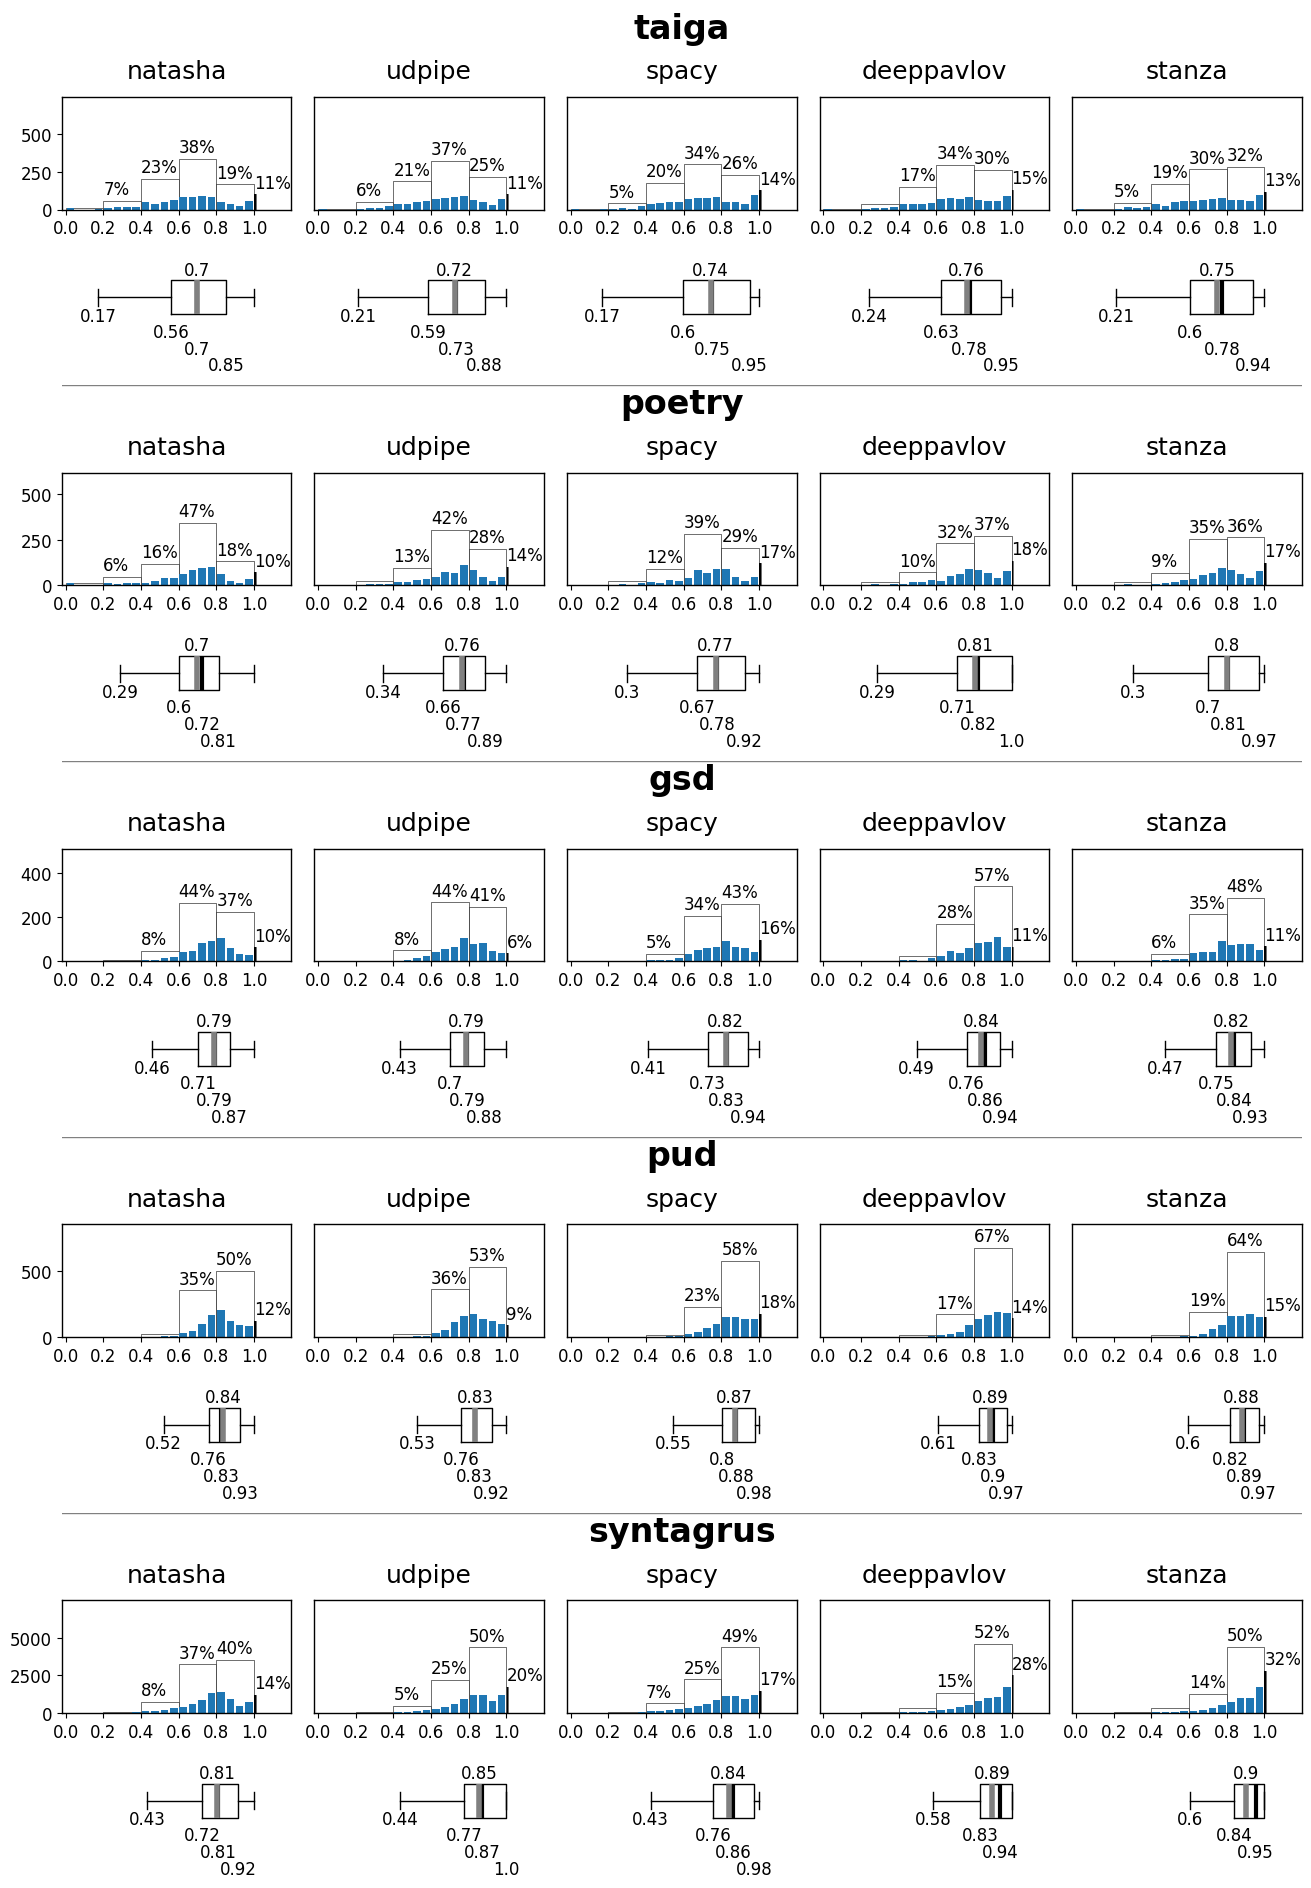

In [ ]:
draw_similarity_diagrams(similarity_results, 'pics/graph_similarity')

-----------
# Сравнение метрик
-----------

До следующего раздела код позаимствован из ноутбука https://github.com/Derinhelm/parser_stat/blob/mmd_metric/treebank_test_sets/ru_syntagrus-ud-test.conllu

In [ ]:
import networkx as nx

def create_graph(s):
  tokens = [t for t in s.tokens if '.' not in t.id]
  s.graph = nx.DiGraph()
  s.graph.add_node('0', word='root')
  for w in tokens:
    s.graph.add_node(w.id, word=w.form)
  for w in tokens:
    s.graph.add_edge(w.parent_id, w.id, dep_rel=w.relation)

  for t in tokens:
      t.root_depth = nx.shortest_path_length(s.graph, '0', t.id)
  s.graph_depth = max(t.root_depth for t in tokens)

for treebank_n in treebank_names:
    for sent_i in range(len(treebanks[treebank_n])):
      create_graph(treebanks[treebank_n][sent_i])

In [ ]:
def calculate_stat(be_gold, be_res_p):
  stat_list = []
  for sent_id in be_gold:
    extra_gold = len(be_gold[sent_id].keys() - be_res_p[sent_id].keys())
    extra_parser = len(be_res_p[sent_id].keys() - be_gold[sent_id].keys())
    tokenisation_matched = len({t_be for t_be in be_res_p[sent_id].keys() & be_gold[sent_id].keys()})
    parent_matched = len({t_be for t_be in be_res_p[sent_id].keys() & be_gold[sent_id].keys()
      if be_res_p[sent_id][t_be][0] == be_gold[sent_id][t_be][0]})
    relation_matched = len({t_be for t_be in be_res_p[sent_id].keys() & be_gold[sent_id].keys()
      if be_res_p[sent_id][t_be] == be_gold[sent_id][t_be]})
    stat_list.append((sent_id, extra_gold, extra_parser, tokenisation_matched,
                      parent_matched, relation_matched, len(be_gold[sent_id])))
  stat = pd.DataFrame(stat_list, columns=['sent_id', 'extra_gold', 'extra_parser', 'tokenisation_matched',
                                             'parent_matched', 'relation_matched', 'token_length'])

  align_uas_precision = stat['parent_matched'] / (stat['extra_parser'] + stat['tokenisation_matched'])
  align_uas_recall = stat['parent_matched'] / (stat['extra_gold'] + stat['tokenisation_matched'])
  align_las_precision = stat['relation_matched'] / (stat['extra_parser'] + stat['tokenisation_matched'])
  align_las_recall = stat['relation_matched'] / (stat['extra_gold'] + stat['tokenisation_matched'])
  align_uas_f = ((2 * align_uas_precision * align_uas_recall) / (align_uas_precision + align_uas_recall)).fillna(0.0)
  align_las_f = ((2 * align_las_precision * align_las_recall) / (align_las_precision + align_las_recall)).fillna(0.0)
  return align_uas_f, align_las_f

In [ ]:
align_uas_f = {treebank: {} for treebank in treebank_names}
align_las_f = {treebank: {} for treebank in treebank_names}
for treebank in treebank_names:
  for p in parser_names:
    align_uas_f[treebank][p], align_las_f[treebank][p] = \
        calculate_stat(be_treebanks[treebank], be_parser_res[p][treebank])
align_res = {"uas_f": align_uas_f,
             "las_f": align_las_f}

In [ ]:
from IPython.display import Latex
def create_latex(df):
  return df.style.set_table_styles([
    {'selector': 'toprule', 'props': ':hline;'},
    {'selector': 'midrule', 'props': ':hline;'},
    {'selector': 'bottomrule', 'props': ':hline;'},
   ], overwrite=False).format(lambda s: f"{s:.2f}").to_latex(clines="all;data",  column_format="|l|l|l|l|l|l|")

In [ ]:
parser_titles = ["UDPipe", "Stanza", "Natasha", "DeepPavlov", "spacy"]
treebank_titles = ["GSD", "PUD", "SynTagRus", "Poetry", "Taiga"]

In [ ]:
import numpy as np

def get_ax(ax, lang_i, x_count, y_count):
    if isinstance(ax[0], np.ndarray):
      x = lang_i // y_count
      y = lang_i % y_count
      return ax[x, y]
    else:
      return ax[lang_i]

In [ ]:
colormaps['tab20'].colors[14:16]

((0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451))

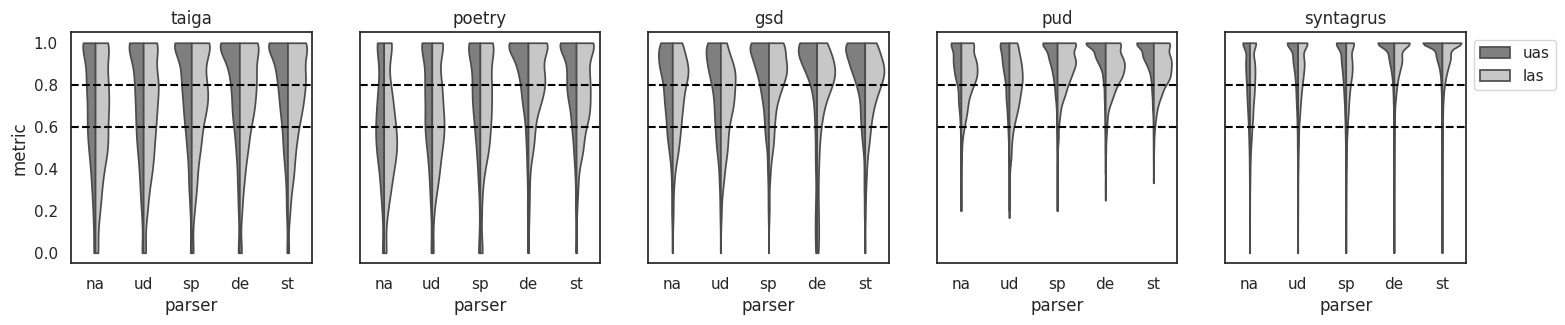

In [ ]:
import seaborn as sns
sns.set_theme(style="white", palette=colormaps['tab20'].colors[14:16])
#sns.set_theme(style="white", palette=colormaps['tab20'].colors[3::2])

f, axs = plt.subplots(1, 5, figsize=(18, 3), sharey=True)
for treebank_i, t in enumerate(treebank_names):
    t_list = []
    for p in parser_names:
      t_list += [(m, "uas", p[:2]) for m in align_uas_f[t][p]] + [(m, "las", p[:2]) for m in align_las_f[t][p]]
    t_df = pd.DataFrame(t_list, columns=['metric', 'type', 'parser'])
    sns.violinplot(data=t_df, x="parser", y="metric", hue="type", split=True, cut=0, ax=axs[treebank_i], inner=None, legend=treebank_i == len(treebank_names) - 1)
    axs[treebank_i].axhline(y=0.6, color="black", linestyle="--")
    axs[treebank_i].axhline(y=0.8, color="black", linestyle="--")
    if treebank_i == len(treebank_names) - 1:
        axs[treebank_i].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    axs[treebank_i].set_title(t)
plt.savefig("/content/pics/distribution_diagram.eps", format='eps', dpi=300, bbox_inches='tight')
plt.savefig("/content/pics/distribution_diagram.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()

## Само сравнение

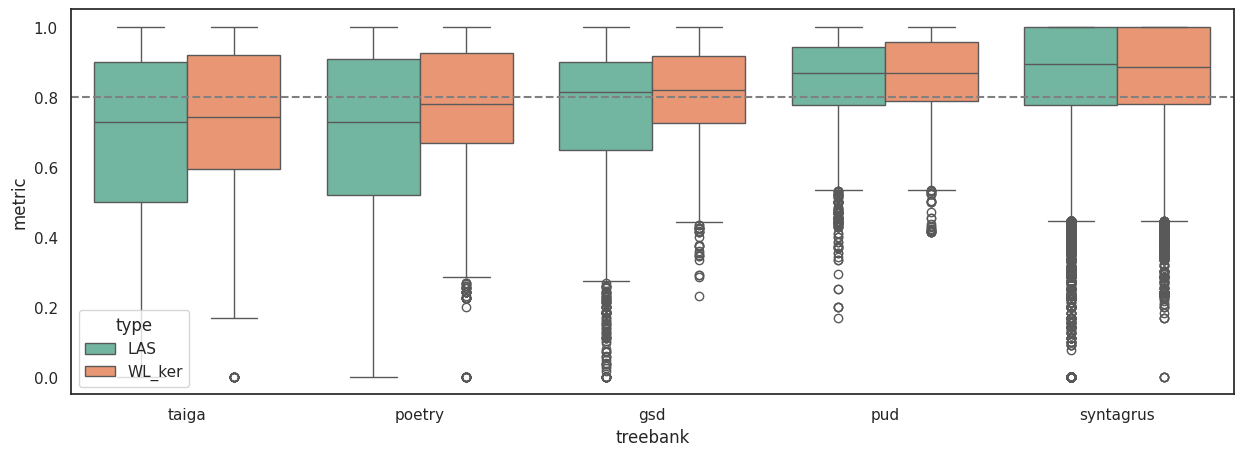

In [ ]:
plt.figure(figsize=(15, 5))
data = []
for t in treebank_names:
    for p in parser_names:
        data.extend([(m, "LAS", t, p[:2]) for m in align_las_f[t][p]] +
                   [(m, "WL_ker", t, p[:2]) for m in similarity_results[p][t]])
df = pd.DataFrame(data, columns=['metric', 'type', 'treebank', 'parser'])
sns.boxplot(data=df, x="treebank", y="metric", hue="type", palette="Set2")
plt.axhline(0.8, linestyle="--", color="gray")

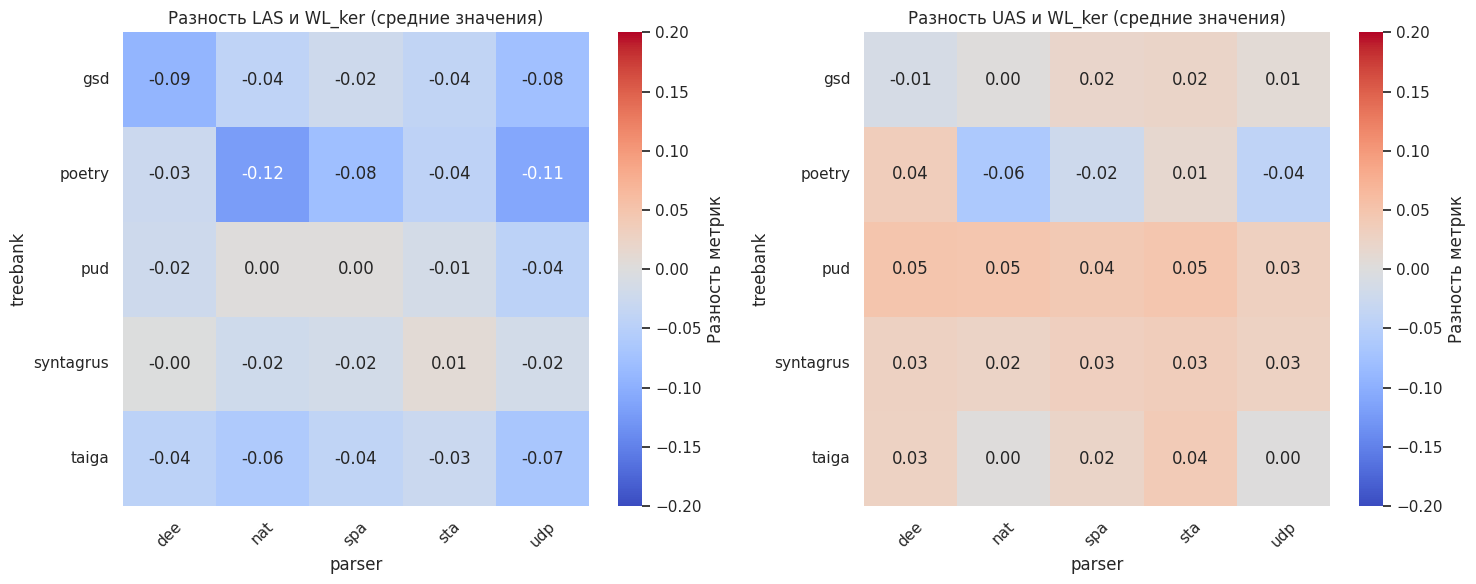

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем DataFrame с разностями метрик
diff_data = []
for t in treebank_names:
    for p in parser_names:
        las_mean = np.mean(align_las_f[t][p])
        wl_mean = np.mean(similarity_results[p][t])
        diff_data.append({
            'treebank': t,
            'parser': p[:3],  # Берем первые 3 символа имени парсера
            'LAS-WL_ker': las_mean - wl_mean,
            'UAS-WL_ker': np.mean(align_uas_f[t][p]) - wl_mean
        })

df_diff = pd.DataFrame(diff_data)

# Настраиваем график
plt.figure(figsize=(15, 6))

# Тепловая карта для разности LAS - WL_ker
plt.subplot(1, 2, 1)
pivot_las_diff = df_diff.pivot(index='treebank', columns='parser', values='LAS-WL_ker')
sns.heatmap(pivot_las_diff, annot=True, fmt=".2f", cmap="coolwarm",
            center=0, vmin=-0.2, vmax=0.2, cbar_kws={'label': 'Разность метрик'})
plt.title("Разность LAS и WL_ker (средние значения)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Тепловая карта для разности UAS - WL_ker
plt.subplot(1, 2, 2)
pivot_uas_diff = df_diff.pivot(index='treebank', columns='parser', values='UAS-WL_ker')
sns.heatmap(pivot_uas_diff, annot=True, fmt=".2f", cmap="coolwarm",
            center=0, vmin=-0.2, vmax=0.2, cbar_kws={'label': 'Разность метрик'})
plt.title("Разность UAS и WL_ker (средние значения)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig("metrics_difference_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
def filter_single_word_sentences(treebank_data, parser_data_dict, n = 1):
    """Удаляет предложения длиной 1 токен, сохраняя соответствие между эталоном и парсерами"""
    # Находим общие предложения с длиной > n для всех данных
    common_sent_ids = {
        sent_id for sent_id, sent in treebank_data.items()
        if len(sent) > n
    }

    # Фильтруем эталонные данные
    filtered_treebank = {
        sent_id: sent for sent_id, sent in treebank_data.items()
        if sent_id in common_sent_ids
    }

    # Фильтруем данные парсеров
    filtered_parsers = {}
    for parser_name, parser_data in parser_data_dict.items():
        filtered_parsers[parser_name] = {
            sent_id: sent for sent_id, sent in parser_data.items()
            if sent_id in common_sent_ids
        }

    return filtered_treebank, filtered_parsers

In [ ]:
# Пересчитываем метрики для отфильтрованных данных
def calculate_filtered_stats():
    filtered_align_uas_f = {t: {} for t in treebank_names}
    filtered_align_las_f = {t: {} for t in treebank_names}
    filtered_similarity_results = {p: {} for p in parser_names}

    for treebank in treebank_names:
        for p in parser_names:
            # Вычисляем UAS и LAS
            filtered_align_uas_f[treebank][p], filtered_align_las_f[treebank][p] = \
                calculate_stat(filtered_be_treebanks[treebank], filtered_be_parser_res[p][treebank])

            # Вычисляем WL_ker
            Graphs_P1 = []
            for sent_id, item in filtered_be_treebanks[treebank].items():
                Graphs_P1.append(networkx_formatter(item, nx.DiGraph()))

            Graphs_Q1 = []
            for sent_id, item in filtered_be_parser_res[p][treebank].items():
                Graphs_Q1.append(networkx_formatter(item, nx.DiGraph()))

            filtered_similarity_results[p][treebank] = new_wl_ker1(Graphs_P1, Graphs_Q1, h=3)

    return filtered_align_uas_f, filtered_align_las_f, filtered_similarity_results

In [ ]:
def plot_identical_violins(metric1_data, metric2_data, metric1_name, metric2_name):
    sns.set_theme(style="white", palette=colormaps['tab20'].colors[14:16])

    f, axs = plt.subplots(1, 5, figsize=(18, 3), sharey=True)

    for treebank_i, t in enumerate(treebank_names):
        t_list = []
        for p in parser_names:
            # Комбинируем данные двух метрик
            t_list += [(m, metric1_name, p[:2]) for m in metric1_data[t][p]]
            t_list += [(m, metric2_name, p[:2]) for m in metric2_data[p][t]]

        t_df = pd.DataFrame(t_list, columns=['metric', 'type', 'parser'])

        # Построение violinplot (точное повторение вашего стиля)
        sns.violinplot(data=t_df, x="parser", y="metric", hue="type",
                       split=True, cut=0, ax=axs[treebank_i],
                       inner=None, legend=treebank_i == len(treebank_names) - 1, alpha=1)

        # Горизонтальные линии в вашем стиле
        axs[treebank_i].axhline(y=0.6, color="black", linestyle="--", linewidth=0.8)
        axs[treebank_i].axhline(y=0.8, color="black", linestyle="--", linewidth=0.8)

        # Настройка заголовка и легенды
        axs[treebank_i].set_title(t)
        if treebank_i == len(treebank_names) - 1:
            axs[treebank_i].legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

    # Сохранение в файлы (как в оригинале)
    plt.savefig("/content/pics/filtered_distribution_diagram.eps",
                format='eps', dpi=300, bbox_inches='tight', transparent=False)
    plt.savefig("/content/pics/filtered_distribution_diagram.jpg",
                format='jpg', dpi=300, bbox_inches='tight')
    plt.show()

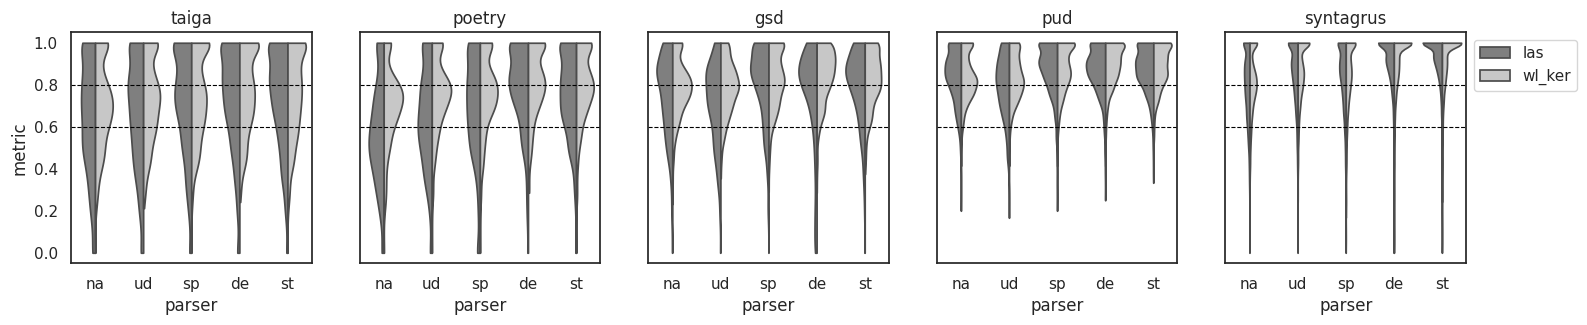

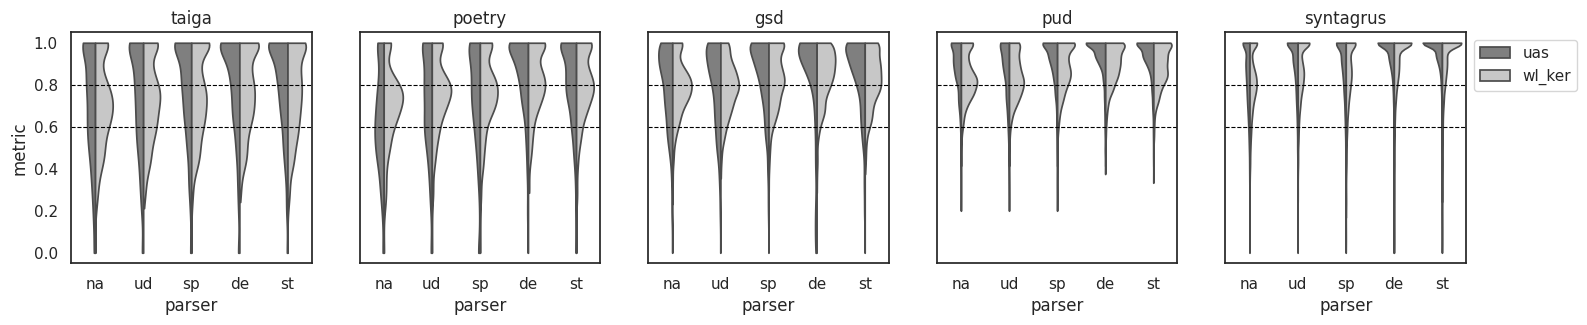

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Фильтруем данные, сохраняя соответствие
filtered_be_treebanks = {}
filtered_be_parser_res = {p: {} for p in parser_names}

for t in treebank_names:
    # Фильтруем попарно для каждого treebank
    parser_data = {p: be_parser_res[p][t] for p in parser_names}
    filtered_be_treebanks[t], filtered_parsers = filter_single_word_sentences(be_treebanks[t], parser_data)

    for p in parser_names:
        filtered_be_parser_res[p][t] = filtered_parsers[p]

# Проверка согласованности размеров
for t in treebank_names:
    ref_size = len(filtered_be_treebanks[t])
    for p in parser_names:
        parser_size = len(filtered_be_parser_res[p][t])
        assert ref_size == parser_size, f"Несоответствие размеров: {t}, {p}, {ref_size} != {parser_size}"


filtered_align_uas_f, filtered_align_las_f, filtered_similarity_results = calculate_filtered_stats()

# Пример использования с фильтрованными данными:
plot_identical_violins(filtered_align_las_f, filtered_similarity_results, "las", "wl_ker")
plot_identical_violins(filtered_align_uas_f, filtered_similarity_results, "uas", "wl_ker")

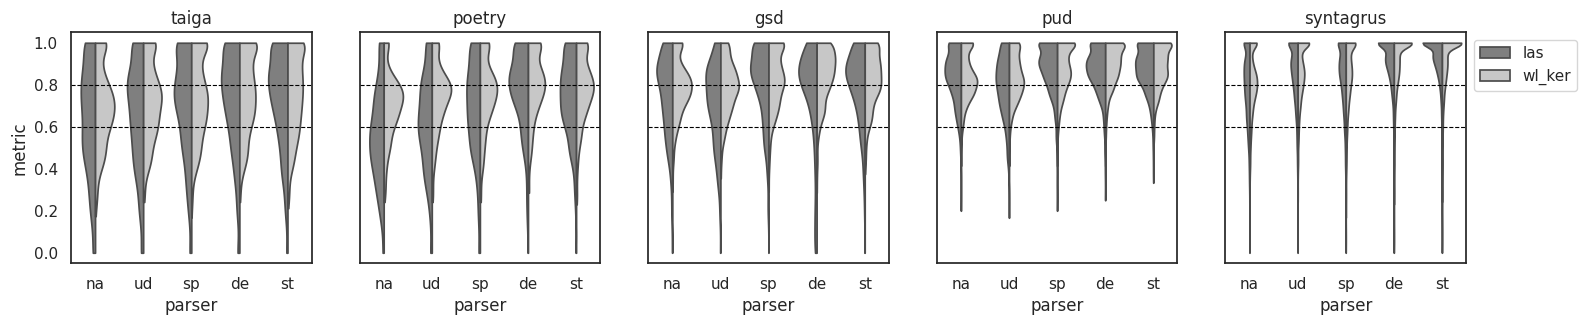

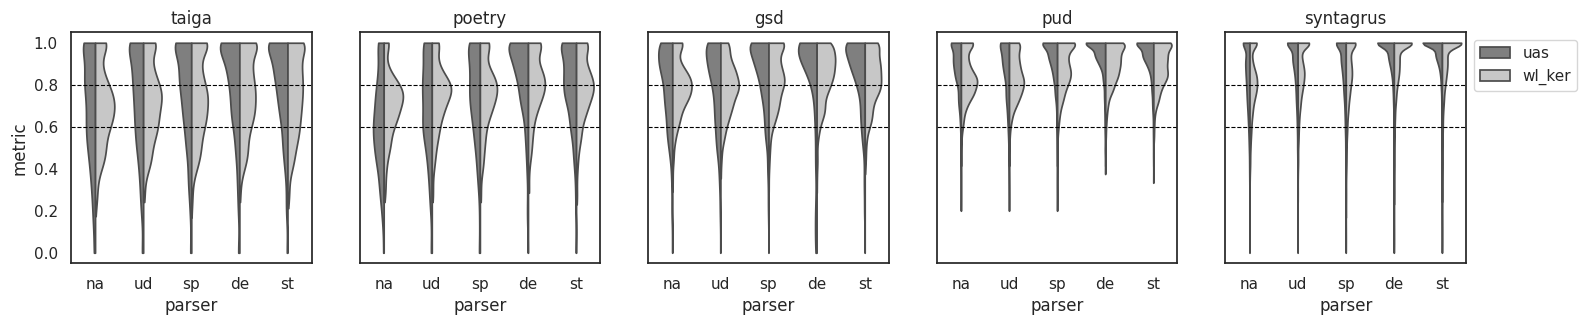

In [ ]:

# Фильтруем данные, сохраняя соответствие
filtered_be_treebanks = {}
filtered_be_parser_res = {p: {} for p in parser_names}

for t in treebank_names:
    # Фильтруем попарно для каждого treebank
    parser_data = {p: be_parser_res[p][t] for p in parser_names}
    filtered_be_treebanks[t], filtered_parsers = filter_single_word_sentences(be_treebanks[t], parser_data, 3)

    for p in parser_names:
        filtered_be_parser_res[p][t] = filtered_parsers[p]

# Проверка согласованности размеров
for t in treebank_names:
    ref_size = len(filtered_be_treebanks[t])
    for p in parser_names:
        parser_size = len(filtered_be_parser_res[p][t])
        assert ref_size == parser_size, f"Несоответствие размеров: {t}, {p}, {ref_size} != {parser_size}"


filtered_align_uas_f, filtered_align_las_f, filtered_similarity_results = calculate_filtered_stats()

# Пример использования с фильтрованными данными:
plot_identical_violins(filtered_align_las_f, filtered_similarity_results, "las", "wl_ker")
plot_identical_violins(filtered_align_uas_f, filtered_similarity_results, "uas", "wl_ker")

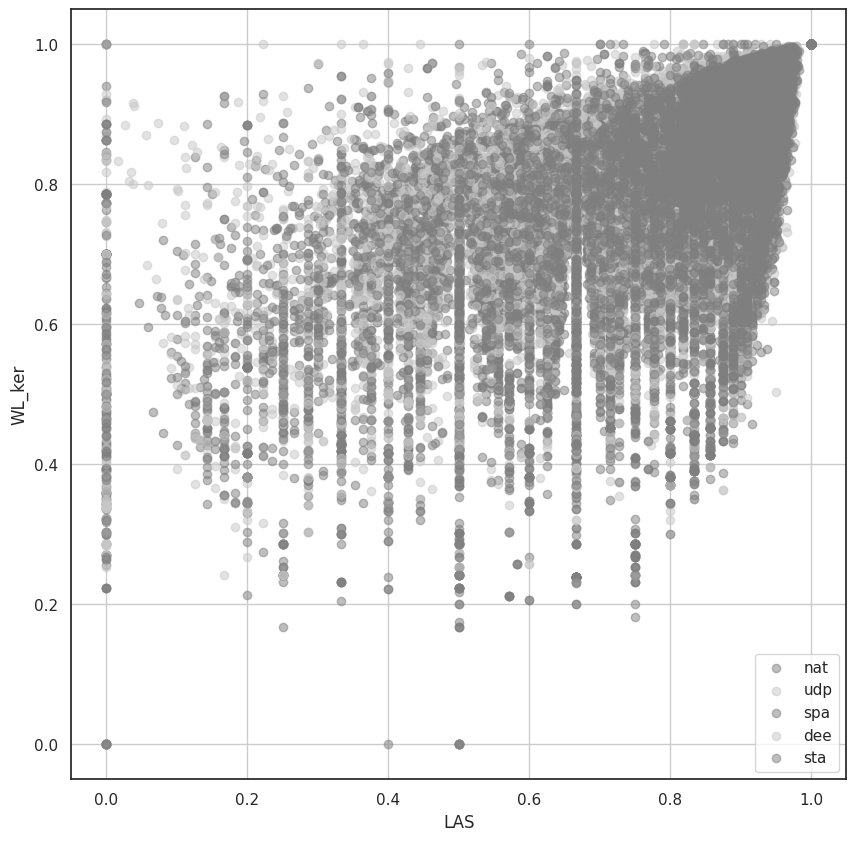

In [ ]:
plt.figure(figsize=(10, 10))
for p in parser_names:
    las_values = []
    wl_values = []
    for t in treebank_names:
        las_values.extend(align_las_f[t][p])
        wl_values.extend(similarity_results[p][t])
    plt.scatter(las_values, wl_values, label=p[:3], alpha=0.5)
plt.xlabel("LAS"); plt.ylabel("WL_ker")
plt.legend(); plt.grid()

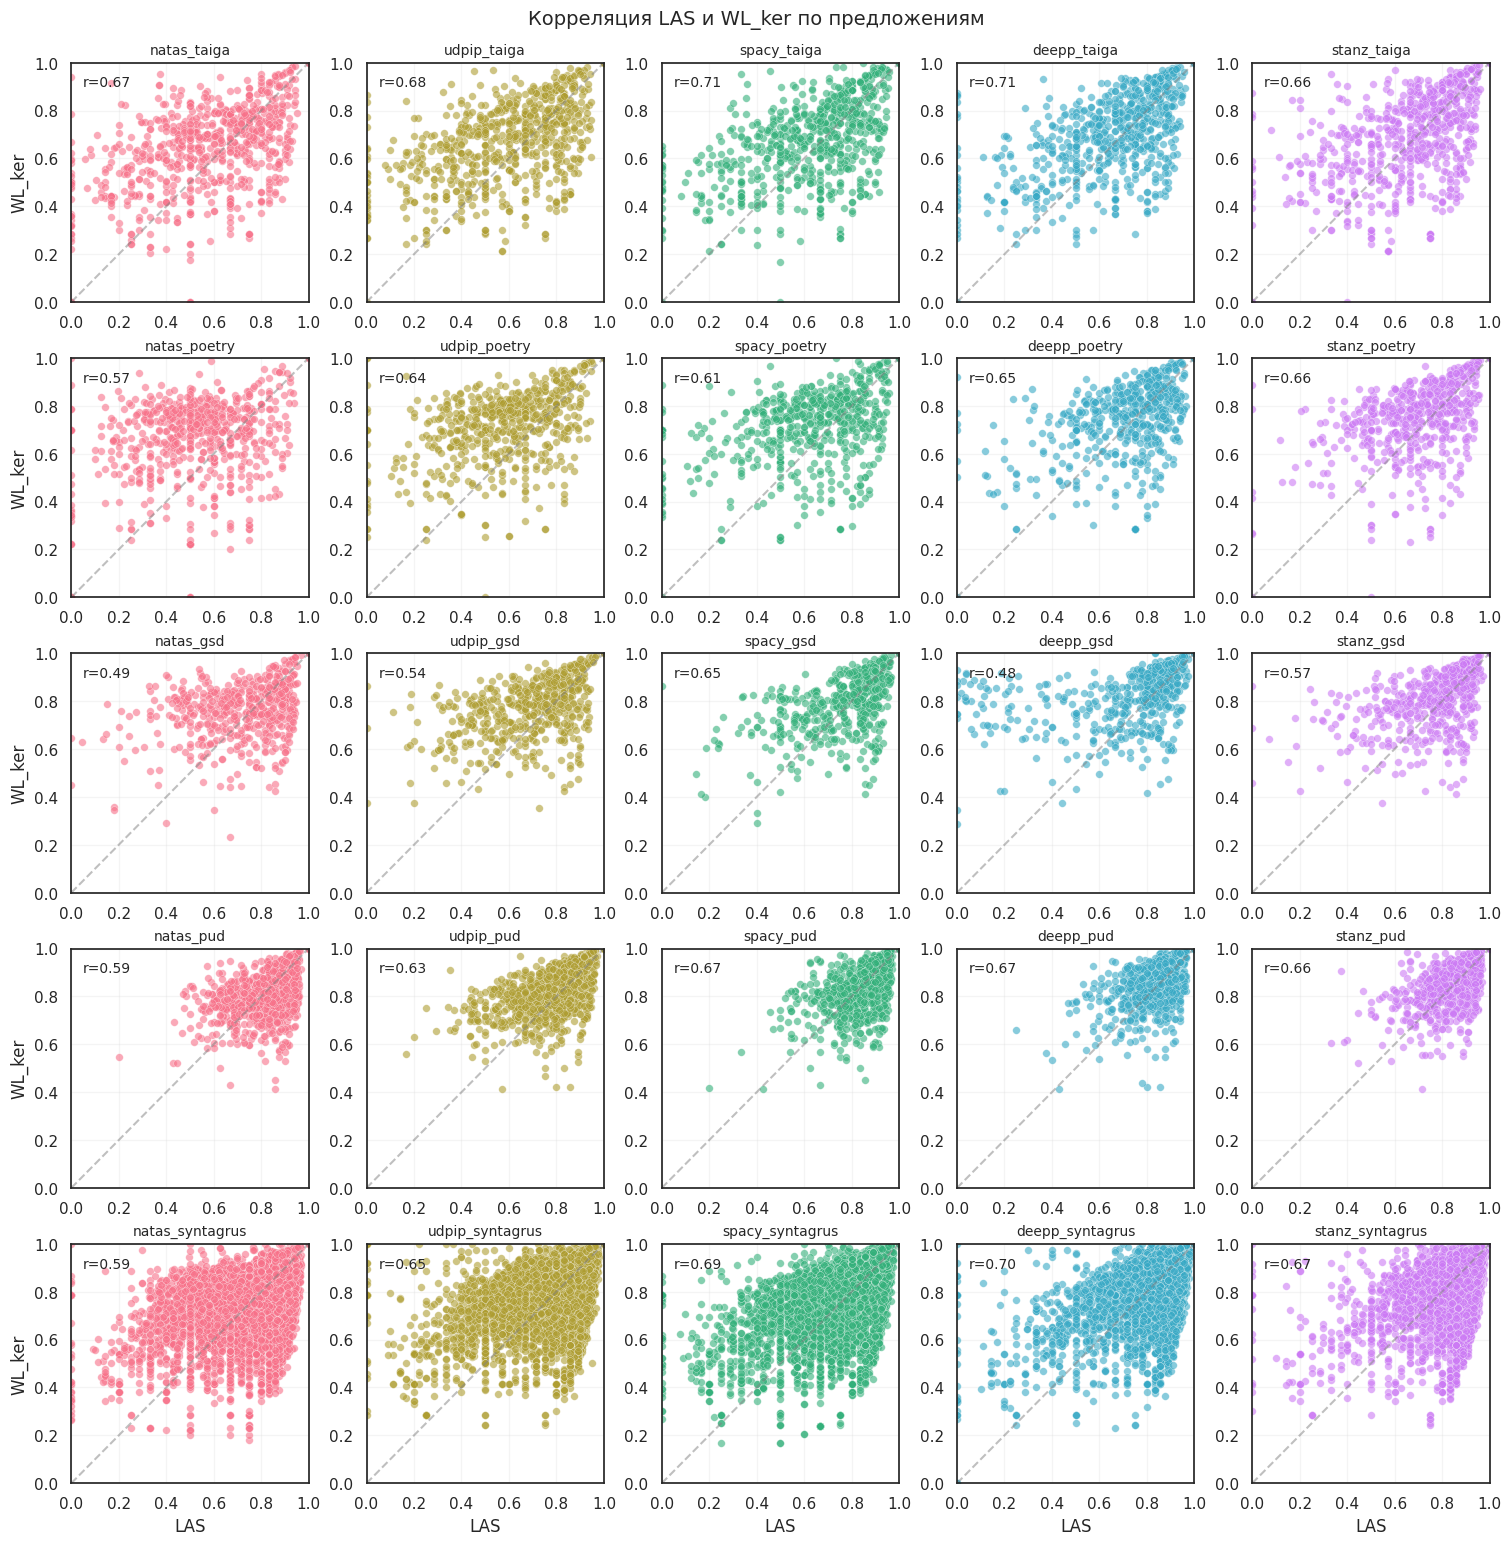

In [ ]:
# Создаем фигуру с подграфиками для каждого сочетания treebank и парсера
f, axs = plt.subplots(len(treebank_names), len(parser_names),
                   figsize=(15, 15),
                   constrained_layout=True)

# Настраиваем цветовую палитру для лучшей различимости
palette = sns.color_palette("husl", len(parser_names))

metric1_name = 'LAS'
metric2_name = 'WL_ker'

for tr_i, tr in enumerate(treebank_names):
    for p_i, p in enumerate(parser_names):
        # Получаем данные для текущего treebank и парсера
        if metric1_name == 'LAS':
            x_vals = align_las_f[tr][p]
        else:  # UAS
            x_vals = align_uas_f[tr][p]

        y_vals = similarity_results[p][tr]

        # Рисуем scatter plot
        scatter = axs[tr_i, p_i].scatter(x_vals, y_vals,
                                       color=palette[p_i],
                                       alpha=0.6,
                                       edgecolor='w',
                                       linewidth=0.3,
                                       s=30)

        # Добавляем линию идеальной корреляции
        max_val = max(max(x_vals), max(y_vals)) if len(x_vals) > 0 else 1
        axs[tr_i, p_i].plot([0, max_val], [0, max_val],
                          '--', color='gray', alpha=0.5)

        # Вычисляем и отображаем коэффициент корреляции
        if len(x_vals) > 1:
            r = np.corrcoef(x_vals, y_vals)[0, 1]
            axs[tr_i, p_i].text(0.05, 0.9, f'r={r:.2f}',
                              transform=axs[tr_i, p_i].transAxes,
                              fontsize=10)

        # Настраиваем заголовок и подписи
        axs[tr_i, p_i].set_title(f"{p[:5]}_{tr[:10]}", fontsize=10)
        axs[tr_i, p_i].grid(True, alpha=0.2)

        # Устанавливаем одинаковые пределы для всех графиков
        axs[tr_i, p_i].set_xlim(0, 1)
        axs[tr_i, p_i].set_ylim(0, 1)

        # Добавляем подписи осей только для первого и последнего графиков в ряду
        if p_i == 0:
            axs[tr_i, p_i].set_ylabel(metric2_name)
        if tr_i == len(treebank_names) - 1:
            axs[tr_i, p_i].set_xlabel(metric1_name)

# Добавляем общий заголовок
f.suptitle(f'Корреляция {metric1_name} и {metric2_name} по предложениям\n',
          y=1.02, fontsize=14)

# Сохраняем результат
plt.savefig(f"scatter_grid_{metric1_name}_vs_{metric2_name}.png",
           dpi=300, bbox_inches='tight')
plt.show()

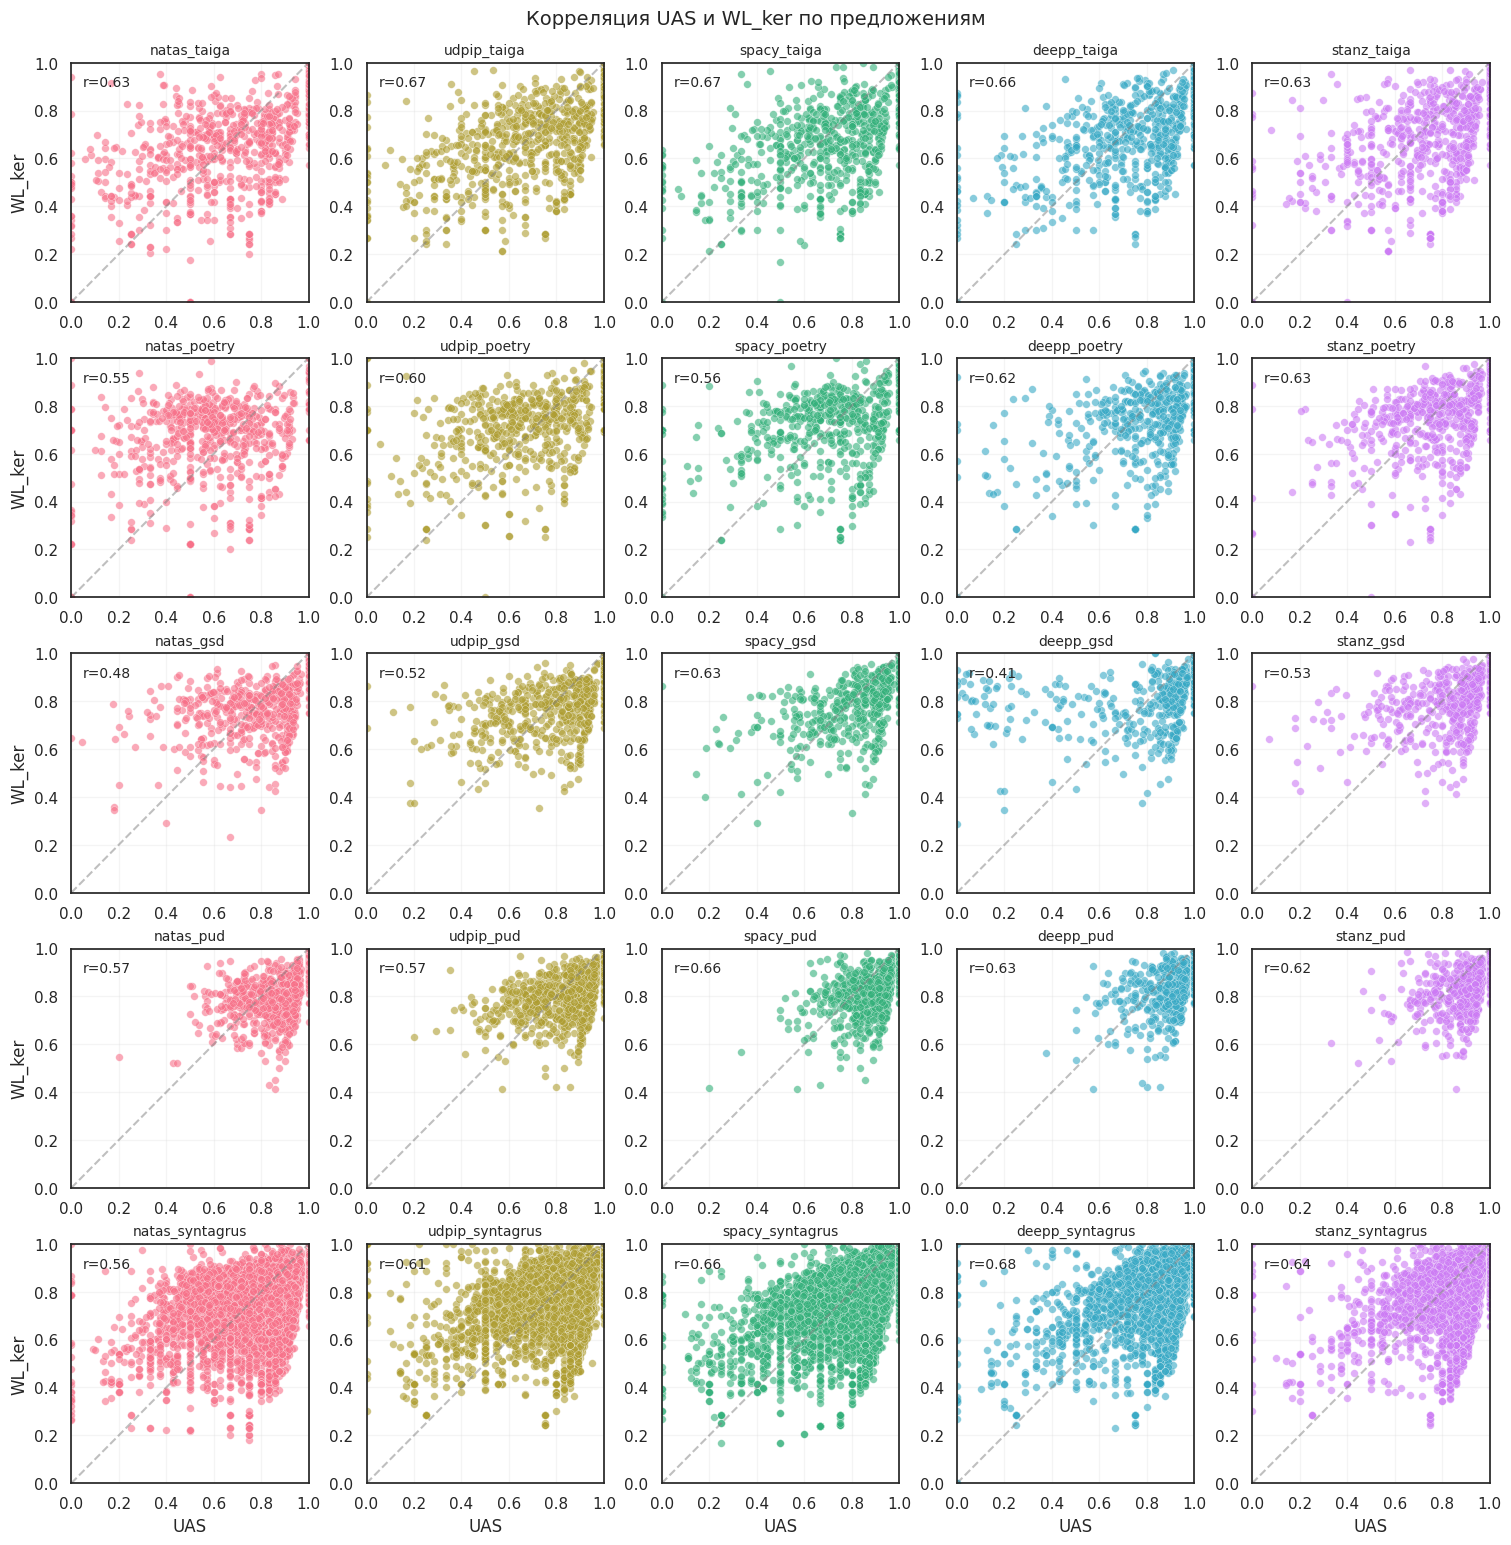

In [ ]:
# Создаем фигуру с подграфиками для каждого сочетания treebank и парсера
f, axs = plt.subplots(len(treebank_names), len(parser_names),
                   figsize=(15, 15),
                   constrained_layout=True)

# Настраиваем цветовую палитру для лучшей различимости
palette = sns.color_palette("husl", len(parser_names))

metric1_name = 'UAS'
metric2_name = 'WL_ker'

for tr_i, tr in enumerate(treebank_names):
    for p_i, p in enumerate(parser_names):
        # Получаем данные для текущего treebank и парсера
        if metric1_name == 'LAS':
            x_vals = align_las_f[tr][p]
        else:  # UAS
            x_vals = align_uas_f[tr][p]

        y_vals = similarity_results[p][tr]

        # Рисуем scatter plot
        scatter = axs[tr_i, p_i].scatter(x_vals, y_vals,
                                       color=palette[p_i],
                                       alpha=0.6,
                                       edgecolor='w',
                                       linewidth=0.3,
                                       s=30)

        # Добавляем линию идеальной корреляции
        max_val = max(max(x_vals), max(y_vals)) if len(x_vals) > 0 else 1
        axs[tr_i, p_i].plot([0, max_val], [0, max_val],
                          '--', color='gray', alpha=0.5)

        # Вычисляем и отображаем коэффициент корреляции
        if len(x_vals) > 1:
            r = np.corrcoef(x_vals, y_vals)[0, 1]
            axs[tr_i, p_i].text(0.05, 0.9, f'r={r:.2f}',
                              transform=axs[tr_i, p_i].transAxes,
                              fontsize=10)

        # Настраиваем заголовок и подписи
        axs[tr_i, p_i].set_title(f"{p[:5]}_{tr[:10]}", fontsize=10)
        axs[tr_i, p_i].grid(True, alpha=0.2)

        # Устанавливаем одинаковые пределы для всех графиков
        axs[tr_i, p_i].set_xlim(0, 1)
        axs[tr_i, p_i].set_ylim(0, 1)

        # Добавляем подписи осей только для первого и последнего графиков в ряду
        if p_i == 0:
            axs[tr_i, p_i].set_ylabel(metric2_name)
        if tr_i == len(treebank_names) - 1:
            axs[tr_i, p_i].set_xlabel(metric1_name)

# Добавляем общий заголовок
f.suptitle(f'Корреляция {metric1_name} и {metric2_name} по предложениям\n',
          y=1.02, fontsize=14)

# Сохраняем результат
plt.savefig(f"scatter_grid_{metric1_name}_vs_{metric2_name}.png",
           dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from collections import OrderedDict, defaultdict
import networkx as nx

def calculate_las_uas_per_sentence(be_gold, be_res_p):
    """
    Вычисляет LAS и UAS для каждого предложения отдельно

    Параметры:
    - be_gold: эталонные данные для датасета (словарь sent_id -> {token_pos: (parent_pos, relation)})
    - be_res_p: результаты парсера (аналогичная структура)

    Возвращает:
    - uas_scores: словарь sent_id -> UAS_score
    - las_scores: словарь sent_id -> LAS_score
    """
    las_scores = {}
    uas_scores = {}

    for sent_id in be_gold:
        if sent_id not in be_res_p:
            las_scores[sent_id] = 0.0
            uas_scores[sent_id] = 0.0
            continue

        gold_tokens = be_gold[sent_id]
        pred_tokens = be_res_p[sent_id]

        # Найдем пересечение токенов (совпадающие по позиции)
        common_tokens = set(gold_tokens.keys()) & set(pred_tokens.keys())

        if len(common_tokens) == 0:
            las_scores[sent_id] = 0.0
            uas_scores[sent_id] = 0.0
            continue

        # Подсчитаем правильные головы (UAS) и правильные отношения (LAS)
        correct_heads = 0
        correct_labels = 0

        for token_pos in common_tokens:
            gold_head, gold_label = gold_tokens[token_pos]
            pred_head, pred_label = pred_tokens[token_pos]

            # UAS: правильная голова
            if gold_head == pred_head:
                correct_heads += 1

            # LAS: правильная голова И правильное отношение
            if gold_head == pred_head and gold_label == pred_label:
                correct_labels += 1

        # Вычисляем метрики как долю от общего числа токенов
        total_tokens = len(common_tokens)
        uas_scores[sent_id] = correct_heads / total_tokens
        las_scores[sent_id] = correct_labels / total_tokens

    return uas_scores, las_scores

def find_low_wl_high_las_uas(similarity_results, be_treebanks, be_parser_res,
                             wl_threshold=0.5, las_threshold=0.7, uas_threshold=0.7, reverse=False):
    """
    Находит предложения с низкой WL метрикой, но высокой LAS/UAS

    Параметры:
    - similarity_results: результаты WL метрики {parser: {treebank: array_of_similarities}}
    - be_treebanks: эталонные данные {treebank: {sent_id: token_dependencies}}
    - be_parser_res: результаты парсеров {parser: {treebank: {sent_id: token_dependencies}}}
    - wl_threshold: порог для "низкой" WL метрики (ниже этого значения)
    - las_threshold: порог для "высокой" LAS метрики (выше этого значения)
    - uas_threshold: порог для "высокой" UAS метрики (выше этого значения)

    Возвращает:
    - results: словарь {parser: {treebank: [список_аномальных_предложений]}}
    """

    results = {}

    for parser in be_parser_res.keys():
        results[parser] = {}

        for treebank in be_treebanks.keys():
            print(f"Обрабатываем {parser} на {treebank}...")

            # Получаем WL сходства для всех предложений
            wl_similarities = similarity_results[parser][treebank]

            # Вычисляем LAS и UAS для каждого предложения
            uas_scores, las_scores = calculate_las_uas_per_sentence(
                be_treebanks[treebank],
                be_parser_res[parser][treebank]
            )

            # Получаем ID предложений в том же порядке
            sent_ids = list(be_treebanks[treebank].keys())

            # Находим предложения с низкой WL, но высокой LAS/UAS
            candidates = []

            for i, sent_id in enumerate(sent_ids):
                if i < len(wl_similarities):
                    wl_score = wl_similarities[i]
                    las_score = las_scores.get(sent_id, 0.0)
                    uas_score = uas_scores.get(sent_id, 0.0)

                    # Условие: низкая WL И (высокая LAS ИЛИ высокая UAS)
                    if ((reverse and (wl_score > wl_threshold and
                        (las_score < las_threshold or uas_score < uas_threshold)))
                        or (not(reverse) and (wl_score < wl_threshold and
                        (las_score > las_threshold or uas_score > uas_threshold)))):

                        candidates.append({
                            'sent_id': sent_id,
                            'wl_score': wl_score,
                            'las_score': las_score,
                            'uas_score': uas_score
                        })

            results[parser][treebank] = candidates
            print(f"  Найдено {len(candidates)} кандидатов")

    return results

def analyze_anomalous_sentences(anomaly_results):
    """
    Анализирует результаты поиска аномальных предложений

    Параметры:
    - anomaly_results: результаты функции find_low_wl_high_las_uas

    Возвращает:
    - parser_stats: статистика по парсерам
    - treebank_stats: статистика по датасетам
    """
    print("=== АНАЛИЗ ПРЕДЛОЖЕНИЙ С НИЗКОЙ WL, НО ВЫСОКОЙ LAS/UAS ===\n")

    total_anomalies = 0
    parser_stats = {}
    treebank_stats = {}

    # Сбор статистики
    for parser in anomaly_results:
        parser_count = 0
        parser_stats[parser] = {}

        for treebank in anomaly_results[parser]:
            count = len(anomaly_results[parser][treebank])
            parser_count += count
            parser_stats[parser][treebank] = count

            if treebank not in treebank_stats:
                treebank_stats[treebank] = 0
            treebank_stats[treebank] += count

        parser_stats[parser]['total'] = parser_count
        total_anomalies += parser_count

    print(f"Общее количество аномальных предложений: {total_anomalies}\n")

    # Статистика по парсерам
    print("По парсерам:")
    for parser, stats in parser_stats.items():
        print(f"  {parser}: {stats['total']} предложений")
        for treebank in sorted(stats.keys()):
            if treebank != 'total':
                print(f"    {treebank}: {stats[treebank]}")
        print()

    # Статистика по датасетам
    print("По датасетам:")
    for treebank, count in sorted(treebank_stats.items()):
        print(f"  {treebank}: {count} предложений")

    return parser_stats, treebank_stats

def create_detailed_analysis_df(anomaly_results):
    """
    Создает детальный DataFrame с результатами

    Параметры:
    - anomaly_results: результаты функции find_low_wl_high_las_uas

    Возвращает:
    - DataFrame с колонками: parser, treebank, sent_id, wl_score, las_score, uas_score
    """
    records = []

    for parser in anomaly_results:
        for treebank in anomaly_results[parser]:
            for sentence_data in anomaly_results[parser][treebank]:
                records.append({
                    'parser': parser,
                    'treebank': treebank,
                    'sent_id': sentence_data['sent_id'],
                    'wl_score': round(sentence_data['wl_score'], 4),
                    'las_score': round(sentence_data['las_score'], 4),
                    'uas_score': round(sentence_data['uas_score'], 4)
                })

    df = pd.DataFrame(records)
    return df

def analyze_threshold_sensitivity(similarity_results, be_treebanks, be_parser_res,
                                wl_thresholds=[0.3, 0.4, 0.5, 0.6],
                                las_thresholds=[0.6, 0.7, 0.8],
                                uas_thresholds=[0.6, 0.7, 0.8]):
    """
    Анализ чувствительности к порогам
    """
    results = {}

    for wl_t in wl_thresholds:
        for las_t in las_thresholds:
            for uas_t in uas_thresholds:
                key = f"WL<{wl_t}_LAS>{las_t}_UAS>{uas_t}"
                anomalies = find_low_wl_high_las_uas(
                    similarity_results, be_treebanks, be_parser_res,
                    wl_threshold=wl_t, las_threshold=las_t, uas_threshold=uas_t
                )

                total_count = sum(
                    sum(len(anomalies[p][t]) for t in anomalies[p])
                    for p in anomalies
                )

                results[key] = total_count

    return results

In [ ]:
# Базовый анализ с стандартными порогами
anomaly_results = find_low_wl_high_las_uas(
    similarity_results,
    be_treebanks,
    be_parser_res,
    wl_threshold=0.7,    # WL схожесть < 50%
    las_threshold=0.5,   # LAS точность > 70%
    uas_threshold=0.5,    # UAS точность > 70%
    reverse = True
)

# Анализ результатов
parser_stats, treebank_stats = analyze_anomalous_sentences(anomaly_results)

# Создание детальной таблицы
detail_df = create_detailed_analysis_df(anomaly_results)
detail_df.to_csv('anomalous_sentences.csv', index=False)

Обрабатываем natasha на taiga...
  Найдено 47 кандидатов
Обрабатываем natasha на poetry...
  Найдено 103 кандидатов
Обрабатываем natasha на gsd...
  Найдено 21 кандидатов
Обрабатываем natasha на pud...
  Найдено 1 кандидатов
Обрабатываем natasha на syntagrus...
  Найдено 171 кандидатов
Обрабатываем udpipe на taiga...
  Найдено 34 кандидатов
Обрабатываем udpipe на poetry...
  Найдено 60 кандидатов
Обрабатываем udpipe на gsd...
  Найдено 17 кандидатов
Обрабатываем udpipe на pud...
  Найдено 11 кандидатов
Обрабатываем udpipe на syntagrus...
  Найдено 133 кандидатов
Обрабатываем spacy на taiga...
  Найдено 21 кандидатов
Обрабатываем spacy на poetry...
  Найдено 41 кандидатов
Обрабатываем spacy на gsd...
  Найдено 7 кандидатов
Обрабатываем spacy на pud...
  Найдено 0 кандидатов
Обрабатываем spacy на syntagrus...
  Найдено 122 кандидатов
Обрабатываем deeppavlov на taiga...
  Найдено 21 кандидатов
Обрабатываем deeppavlov на poetry...
  Найдено 19 кандидатов
Обрабатываем deeppavlov на gsd...
 